In [206]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")

import re

_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)] 

In [188]:
fasta_dict = SeqIO.to_dict(SeqIO.parse("../../database/sh_refs_qiime_ver8_dynamic_02.02.2019.fasta", "fasta"))

In [189]:
lengthe = []
for key in fasta_dict:
    lengthe.append(len(fasta_dict[key].seq))
print(min(lengthe))
print(max(lengthe))
print(np.mean(lengthe))
print(np.median(lengthe))

205
3526
553.7004794347716
540.0


In [208]:
fasta_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/clinical/barcode04/length_restricted_reads.fasta", "fasta"))

In [209]:
print(len(fasta_dict))

2837


In [214]:
lengthe = []
for key in fasta_dict:
    lengthe.append(len(fasta_dict[key].seq))
print(min(lengthe))
print(max(lengthe))
print(np.mean(lengthe))

1707
3546
2854.5565738456116


In [ ]:
combined = {**fasta_dict1,**fasta_dict2}
print(len(combined))

In [ ]:
SeqIO.write(combined.values(), "../../analysis/Length_Filtered/20171207_FAH18654/barcode03/length_restricted_for_use.fasta", "fasta")

In [ ]:
combined_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/20171207_FAH18654/barcode03/length_restricted_for_use.fasta", "fasta"))
print(len(combined_dict))

In [ ]:
fastq_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171103_FAH15473/barcode02/merged.fastq", "fastq"))

In [ ]:
lengths = []
for key in fastq_dict:
    lengths.append(len(fastq_dict[key].seq))
print("The number of reads in this file is", len(fastq_dict))
ax = sns.distplot(lengths, color="k", kde=False, bins=5000)


ax.set(xlim=(250, 3500))
ax.set_title("Reads spread 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)

plt.show()

In [ ]:
frDNA = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(2700, 3200):
        del frDNA[key]
print("The number of reads between 2700 and 3200 bp in length is", len(frDNA))
EF1a = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(900, 1400):
        del EF1a[key]
print("The number of reads between 900 and 1400 bp in length is", len(EF1a))

In [ ]:
# Write the reads defined between the frDNA cutoff into a new fasta file
SeqIO.write(frDNA.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_clipped.fastq", "fastq")

In [ ]:
# Write the reads defined between the EF1a cutoff into a new fasta file
SeqIO.write(EF1a.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_EF1a_clipped.fastq", "fastq")

In [ ]:
frDNA_extract={k: frDNA[k] for k in list(frDNA.keys())[:500]}
EF1a_extract={k: EF1a[k] for k in list(EF1a.keys())[:500]}

In [ ]:
for key in frDNA_extract:
    frDNA_extract[key].annotations = 'frDNA'
for key in EF1a_extract:
    EF1a_extract[key].annotations = 'EF1a'

In [ ]:
combined_extract = {}
combined_extract.update(frDNA_extract)
combined_extract.update(EF1a_extract)
print(len(frDNA_extract))
print(len(EF1a_extract))
print(len(combined_extract))

In [ ]:
SeqIO.write(frDNA_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_extract_test.fastq", "fastq")
SeqIO.write(EF1a_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_EF1a_extract_test.fastq", "fastq")
SeqIO.write(combined_extract.values(), "../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_combined_extract_test.fastq", "fastq")

In [ ]:
frDNA_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/frDNA_clipped_test.paf", sep='\t', header=None, engine='python')
EF1a_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/EF1a_clipped_test.paf", sep='\t', header=None, engine='python')
combined_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/combined_test.paf", sep='\t', header=None, engine='python')

In [ ]:
frDNA_paf.head()

In [ ]:
combined_paf.head()

In [ ]:
print("min len of match for frDNA is", frDNA_paf[1].min())
print("min len of match for EF1a is", EF1a_paf[1].min())
print("min len of match for combined is", combined_paf[1].min())

In [ ]:
print('num matches with unique ids for frDNA is', len(frDNA_paf[0].unique()))
print('num matches with unique ids for EF1a is', len(EF1a_paf[0].unique()))
print('num matches with unique ids for combined is', len(combined_paf[0].unique()))

Compare above (using minimap2) with BLAST approach
    - BLAST may be too slow on a larger dataset


Check with other alignment programs eg. lastz, BLAT (check for others)



# Testing of full size-clipped files for alignment via minimap2
 - For each of the frDNA_clipped and EF1a_clipped files as created above 
     - Look for the number of unique ids in the resultant file
     - Determine the percentage of reads in this range that match homology given total number of reads in the clipped.fastq file

In [ ]:
frDNA_clipped_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/frDNA_clipped_test.paf", sep='\t', header=None, engine='python')

In [ ]:
EF1a_clipped_paf = pd.read_csv("../../analysis/Python_Processing/20171103_FAH15473/barcode02/EF1a_clipped_test.paf", sep='\t', header=None)

In [ ]:
print('Total number of matches found for frDNA is', len(frDNA_clipped_paf[0].unique()))
print('Percentage of matches in region =', "{:.3%}".format((len(frDNA_clipped_paf[0].unique())/167054)))

In [ ]:
print('Total number of matches found for EF1a is', len(EF1a_clipped_paf[0].unique()))
print('False positive percentage =', "{:.3%}".format((len(EF1a_clipped_paf[0].unique())/192712)))

In [ ]:
print('Total number of matches found for the total of reads is', len(combined_paf[0].unique()))
print('Percentage of matches overall =', "{:.3%}".format((len(combined_paf[0].unique())/413127)))

~~Plot distribution of matching reads as above~~

~~Repeat minimap2 for above to see if fluctuations~~

Explore non-mapping 25%

Scaling - plots saved out, file for statistics (loop over later)

In [ ]:
# combined_ids = []
# for key in combined_paf[0].unique():
#     combined_ids.append(key)
combined_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171103_FAH15473/barcode02/merged.fastq", "fastq"))
comb_dict = {}
for key in combined_paf[0].unique():
    comb_dict[key] = combined_dict[key]

In [ ]:
lengths = []
comb_keys = []
for key in comb_dict:
    lengths.append(len(comb_dict[key].seq))
    comb_keys.append(key)

mean = np.mean(lengths)
std = np.std(lengths)
print(mean)
print(std)
    
# stats_dict = {'number of frDNA reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
# stats = pd.DataFrame(stats_dict, index=['20171103_FAH15473/barcode02'])
        
              
# ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
# ax.set(xlim=(250, 3500))
# ax.set_title("frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
# ax.set_xlabel("Length of read", fontsize=13)
# ax.set_ylabel("Number of reads", fontsize=13)
# plt.show()


# ax = sns.distplot(lengths, color="k", kde=False, bins=5000)
# ax.set(xlim=(2400, 3500))
# ax.set_title("frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
# ax.set_xlabel("Length of read", fontsize=13)
# ax.set_ylabel("Number of reads", fontsize=13)
# plt.show()


# display(stats)

In [ ]:
fr_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Python_Processing/20171103_FAH15473/barcode02/barcode02_frDNA_clipped.fastq", 'fastq'))
print(len(fr_dict))

In [ ]:
# non_dict = {}
# for key in fr_dict:
#     if key not in frDNA_clipped_paf[0].unique():
#         non_dict[key] = fr_dict[key]
# print(len(non_dict))

In [ ]:
# lengths = []
# non_keys = []
# for key in non_dict:
#     lengths.append(len(non_dict[key].seq))
#     non_keys.append(key)

# non_dict_stats = {'number of reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
# stats = pd.DataFrame(non_dict_stats, index=['20171103_FAH15473/barcode02'])
        
              
# ax = sns.distplot(lengths, color="k", kde=False)
# # ax.set(xlim=(250, 3500))
# ax.set_title("non-frDNA reads for 20171103_FAH15473/barcode02", fontsize=15)
# ax.set_xlabel("Length of read", fontsize=13)
# ax.set_ylabel("Number of reads", fontsize=13)
# plt.show()
# display(stats)

In [ ]:
%%writefile ../summary_statistics.py

"""
The goal of this program is to examine the distribution of reads within
each file, and for the files generated after homology analysis.
The program will generate summary statistics for the result of the homology
analysis and save figures illustrating the read distribution for the
frDNA reads
"""

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
The goal of this program is to examine the distribution of reads within
each file, and for the files generated after homology analysis.
The program will generate summary statistics for the result of the homology
analysis and save figures illustrating the read distribution for the
frDNA reads
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("full_file", help="The full, unfiltered file containing all reads for this barcode")
parser.add_argument("input_folder", help="The destination folder within which the .paf files are generated")
parser.add_argument("output_folder", help="The destination folder for any outputs from this script - including summary statistics file and plots")
args = parser.parse_args()

print('\033[0;35m'+'START'+'\033[1;37m')

output_folder = args.output_folder.rsplit('/', 1)[-2]
input_folder = args.input_folder.rsplit('/', 1)[-2]
if args.verbose:
    print('\033[0;31m' + "Input folder is " + input_folder + '\033[1;37m')
    print('\033[0;31m' + "Output folder is " + output_folder + '\033[1;37m')
    print('\033[0;34m' + "Loading " + args.full_file + '\033[1;37m')

# Load the full file containing all reads for this barcode
full_file_dict = SeqIO.to_dict(SeqIO.parse(args.full_file, "fastq"))

if args.verbose:
    print('\033[0;34m' + "Loaded " + args.full_file + '\033[1;37m')

# Extract the information about the lengths of the sequence for each read in this barcode
full_lengths = []
for key in full_file_dict:
    full_lengths.append(len(full_file_dict[key].seq))
full_lengths_len = len(full_file_dict)


# Plot the spread of read lengths for this barcode
    # Expect to see two peaks - one for EF1a and one for frDNA
ax = sns.distplot(full_lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("Read spread for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
figure1 = ax.get_figure()
# Save this figure out
figure1.savefig('/'.join([output_folder, 'full_read_spread.png']))
figure1.clf()
if args.verbose:
    print('\033[0;32m' + "Full spread image file saved to " + '/'.join([output_folder, 'full_read_spread.png']) + '\033[1;37m')
    print('\033[0;34m' + "Loading " + input_folder+"/combined_test.paf" + '\033[1;37m')

# Import the PAF file resulting from the minimap2 homology filtering
full_paf = pd.read_csv(input_folder+"/combined_test.paf", sep='\t', header=None, engine='python')
if args.verbose:
    print('\033[0;34m' + "Loaded " + input_folder+"/combined_test.paf" + '\033[1;37m')
# Determine all the read ids present within the homology-filtered dataset
# Then, create a dictionary extracting all the information from the full read file, but ONLY for reads present within the homology-filtered data
full_dict = {}
for key in full_paf[0].unique():
    full_dict[key] = full_file_dict[key]

# For each key in the homology-filtered dictionary, extract the sequence length and key
full_paf_lengths = []
full_keys = []
for key in full_dict:
    full_paf_lengths.append(len(full_dict[key].seq))
    full_keys.append(key)

mean = np.mean(full_paf_lengths)
std = np.std(full_paf_lengths)

if args.verbose:
    print('\033[1;33m' + 'Mean read length is %s' % mean + '\033[1;37m')
    print('\033[1;33m' + 'Standard deviation of read length is %s' % std + '\033[1;37m')
    
    
length_filt_dict = full_dict.copy()
for key in full_keys:
    if len(full_dict[key].seq) < (mean-1.645*std) or len(full_dict[key].seq) > (mean+1.645*std):
        del length_filt_dict[key]

        
        
SeqIO.write(length_filt_dict.values(), '/'.join([output_folder, 'length_restricted_reads.fasta']), "fasta")
if args.verbose:
    print('\033[1;36m' + 'Saved %s' % ('/'.join([output_folder, 'length_restricted_reads.fasta'])) + '\033[1;37m')     
    
    
    
length_filt_lens = []
len_filt_keys = []
for key in length_filt_dict:
    length_filt_lens.append(len(length_filt_dict[key].seq))
    len_filt_keys.append(key)

    
    


    
Extract the qscores
if args.verbose:
    print('\033[0;34m' + "Loading " + 'Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt' + '\033[1;37m')
summ_stats_csv = pd.read_csv('Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt', sep='\t', header=None, names=['filename', 'read_id', 'run_id', 'batch_id', 'channel', 'mux', 'start_time', 'duration', 'num_events', 'passes_filtering', 'template_start', 'num_events_template', 'template_duration', 'sequence_length_template', 'mean_qscore_template', 'strand_score_template', 'median_template', 'mad_template'], engine='python')
summ_stats_csv = pd.DataFrame(summ_stats_csv[1:])
summary_list = []
for column, row in summ_stats_csv.iterrows():
    if row['read_id'] in full_keys:
        summary_list.append([row['read_id'], row['mean_qscore_template']])
summary_frame = pd.DataFrame(summary_list)
if args.verbose:
    print('\033[0;34m' + "Finished with " + 'Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt' + '\033[1;37m')
    
Create a dictionary containing the statistics for the filtered dataset
    Total no. frDNA reads, Min. read length, Max. read length, Mean read length, Median read length, Quality score

stats_dict = {'number of frDNA reads':len(length_filt_lens),'minimum read length':min(length_filt_lens),'maximum read length':max(length_filt_lens),'mean read length':"{:.0f}".format(np.mean(length_filt_lens)),'std dev':"{:.0f}".format(np.std(length_filt_lens)),'median read length':"{:.0f}".format(np.median(length_filt_lens))
              ,'min_qscore':"{:.2f}".format(min(summary_frame[1].astype(float))), 'max_qscore':"{:.2f}".format(max(summary_frame[1].astype(float))), 'mean_qscore':"{:.2f}".format(np.mean(summary_frame[1].astype(float))), 'median_qscore':"{:.2f}".format(np.median(summary_frame[1].astype(float)))
             }
stats = pd.DataFrame(stats_dict, index=['%s' % '/'.join(args.full_file.rsplit('/')[-3:-1])])    
              
bx = sns.distplot(length_filt_lens, color="k", kde=False)
bx.set(xlim=(250, 3500))
bx.set_title("frDNA reads for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
bx.set_xlabel("Length of read", fontsize=13)
bx.set_ylabel("Number of reads", fontsize=13)
figure2 = bx.get_figure()
figure2.savefig('/'.join([output_folder, 'frDNA_len_filt_full.png']))
figure2.clf()
if args.verbose:
    print('\033[0;32m' + "frDNA spread image file saved to " + '/'.join([output_folder, 'frDNA_len_filt_full.png']) + '\033[1;37m')

cx = sns.distplot(length_filt_lens, color="k", kde=False)
cx.set(xlim=((mean-1.645*std)-100, (mean+1.645*std)+100))
cx.set_title("frDNA reads for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
cx.set_xlabel("Length of read", fontsize=13)
cx.set_ylabel("Number of reads", fontsize=13)
figure3 = cx.get_figure()
figure3.savefig('/'.join([output_folder, 'frDNA_len_filt_limited.png']))
figure3.clf()
if args.verbose:
    print('\033[0;32m' + "Zoomed-in frDNA spread image file saved to " + '/'.join([output_folder, 'frDNA_len_filt_limited.png']) + '\033[1;37m')

stats.to_csv('/'.join([output_folder, 'frDNA_len_filt_statistics.csv']), index=False)
if args.verbose:
    print('\033[0;32m' + "Summary statistics file saved to " + '/'.join([output_folder, 'frDNA_len_filt_statistics.csv']) + '\033[1;37m')
    
print('\033[0;35m'+'END'+'\033[1;37m')

In [ ]:
import glob
path = "/media/MassStorage/tmp/TE/honours/analysis/Stats/*/*/frDNA_statistics.csv"
path_names = glob.glob(path)
full_stats = pd.DataFrame(data=None, columns = ['number of frDNA reads','minimum read length','maximum read length','mean read length','standard deviation','median read length','min_qscore','max_qscore','mean_qscore','median_qscore'])
for path in path_names:
    if path[67:-21] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
            path_stats_csv = pd.read_csv(path, header=0)
            print(path_stats_csv)
            full_stats = full_stats.append(path_stats_csv)
            full_stats = full_stats.rename(index={0: path[49:-21]})
full_stats = full_stats.sort_index(ascending=True)
full_stats.to_csv('../../analysis/Stats/overall_frDNA_stats.csv')
num_read_stats = pd.DataFrame(data=["{:.0f}".format(min(full_stats['number of frDNA reads'])), "{:.0f}".format(max(full_stats['number of frDNA reads'])), "{:.0f}".format(np.mean(full_stats['number of frDNA reads'])), "{:.0f}".format(np.median(full_stats['number of frDNA reads']))], index=['Min', 'Max', 'Mean', 'Median'], columns=['Number of reads'])
num_read_stats.to_csv('../../analysis/Stats/number_of_frDNA_reads_summary.csv')
full_stats

In [ ]:
print(sum(full_stats['number of frDNA reads']))

In [ ]:
import glob
path = "/10tb/tmp/TE/honours/analysis/Length_Filtered/*/*/*.csv"
path_names = glob.glob(path)
full_stats2 = pd.DataFrame(data=None, columns = ['number of frDNA reads','minimum read length','maximum read length','mean read length','standard deviation','median read length'])
for path in path_names:
    if path[64:-30] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
            path_stats_csv = pd.read_csv(path, header=0)
            full_stats2 = full_stats2.append(path_stats_csv)
            full_stats2 = full_stats2.rename(index={0: path[46:-30]})
full_stats2 = full_stats2.sort_index(ascending=True)
display(full_stats2)
full_stats2.to_csv('../../analysis/Length_Filtered/overall_frDNA_stats.csv')
num_read_stats = pd.DataFrame(data=["{:.0f}".format(min(full_stats2['number of frDNA reads'])), "{:.0f}".format(max(full_stats2['number of frDNA reads'])), "{:.0f}".format(np.mean(full_stats2['number of frDNA reads'])), "{:.0f}".format(np.median(full_stats2['number of frDNA reads']))], index=['Min', 'Max', 'Mean', 'Median'], columns=['Number of reads'])
num_read_stats.to_csv('../../analysis/Length_Filtered/number_of_frDNA_reads_summary.csv')

#### Create matrix for loss-of-reads when performing length filtering as percentage

In [ ]:
full_stats_1 = []
full_stats_2 = []
result = []

for i in full_stats['number of frDNA reads']:
    full_stats_1.append(i)
for i in full_stats2['number of frDNA reads']:
    full_stats_2.append(i)
for i in range (0,len(full_stats_1)):
    result.append(float("{:.2f}".format((full_stats_1[i]-full_stats_2[i])/full_stats_1[i])))
print(result)
print('The maximum loss of reads is %s%% in %s' % (100*max(result), path_names[result.index(max(result))][46:-30]))
print('The minimum loss of reads is %s%% in %s' % (100*min(result), path_names[result.index(min(result))][46:-30]))

In [ ]:
FAH18688_barcode10 = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171212_FAH18688/barcode10/merged.fastq", 'fastq'))
lengths = []
b10_keys = []
for key in FAH18688_barcode10:
    lengths.append(len(FAH18688_barcode10[key].seq))
    b10_keys.append(key)

non_dict_stats = {'number of reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
stats = pd.DataFrame(non_dict_stats, index=['20171212_FAH18688/barcode10'])
              
ax = sns.distplot(lengths, color="k", kde=False)
# ax.set(xlim=(250, 3500))
ax.set_title("Miscalled read spread for 20171212_FAH18688/barcode10", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()
display(stats)

In [ ]:
FAH18654_barcode10 = SeqIO.to_dict(SeqIO.parse("../../analysis/Concatenated/20171207_FAH18654/barcode10/merged.fastq", 'fastq'))
lengths = []
b10_keys = []
for key in FAH18654_barcode10:
    lengths.append(len(FAH18654_barcode10[key].seq))
    b10_keys.append(key)

non_dict_stats = {'number of reads':len(lengths),'minimum read length':min(lengths),'maximum read length':max(lengths),'mean read length':"{:.0f}".format(np.mean(lengths)),'median read length':"{:.0f}".format(np.median(lengths))}
stats = pd.DataFrame(non_dict_stats, index=['20171207_FAH18654/barcode10'])
              
ax = sns.distplot(lengths, color="k", kde=False)
# ax.set(xlim=(250, 3500))
ax.set_title("Miscalled read spread for 20171207_FAH18654/barcode10", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
plt.show()
display(stats)

In [ ]:
barcode02 = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/20171103_FAH15473/barcode02/length_restricted_reads.fasta", "fasta"))
barcode06 = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/20171103_FAH15473/barcode06/length_restricted_reads.fasta", "fasta"))

total_lens = []
for key in barcode02:
    total_lens.append(len(barcode02[key].seq))
for key in barcode06:
    total_lens.append(len(barcode06[key].seq))
print(max(total_lens))
print(min(total_lens))

In [ ]:
barcode02_numbers = {}
for key in barcode02:
    seq = []
    for element in barcode02[key].seq[30:-30]:
        if element == "A":
            seq.append(0)
        elif element == "C":
            seq.append(1)
        elif element == "G":
            seq.append(2)
        elif element == "T":
            seq.append(3)
    if len(seq) < max(total_lens):
        seq.extend([0]*(max(total_lens)-len(seq)))
    barcode02_numbers[key] = seq

In [ ]:
seq2 = np.array(random.choices(list(barcode02_numbers.values()),k=10000))

In [ ]:
barcode06_numbers = {}
for key in barcode06:
    seq = []
    for element in barcode06[key].seq[30:-30]:
        if element == "A":
            seq.append(0)
        elif element == "C":
            seq.append(1)
        elif element == "G":
            seq.append(2)
        elif element == "T":
            seq.append(3)
    if len(seq) < max(total_lens):
        seq.extend([0]*(max(total_lens)-len(seq)))
    barcode06_numbers[key] = seq

In [ ]:
seq6 = np.array(random.choices(list(barcode06_numbers.values()),k=10000))

In [ ]:
seq_comb = np.concatenate((seq2, seq6), axis=0)

In [ ]:
ids2 = np.array([2]*(len(seq2)))
print(len([2]*(len(seq2))))
ids6 = np.array([6]*(len(seq6)))
print(len([2]*(len(seq6))))

In [ ]:
ids_comb = np.concatenate((ids2, ids6), axis=0)

In [ ]:
print(len(seq_comb))
print(len(ids_comb))

In [ ]:
np.savez_compressed('../../analysis/arrays_test/20171103_FAH15473_b2+b6_ids.csv', ids_comb)

In [ ]:
seq_comb[:10]

In [ ]:
np.savez_compressed('../../analysis/arrays_test/20171103_FAH15473_b2+b6_seqs.csv', seq_comb)

In [ ]:
seqs_test = np.load('../../analysis/arrays_test/20171103_FAH15473_b2+b6_seqs.csv.npz', allow_pickle=True)['arr_0']

In [ ]:
seqs_test[:10]

In [ ]:
ids_test = np.load('../../analysis/arrays_test/20171103_FAH15473_b2+b6_ids.csv.npz', allow_pickle=True)['arr_0']

In [ ]:
ids_test[:10]

In [ ]:
ids_test[-10:]

In [ ]:
import glob
path = "/10tb/tmp/TE/honours/analysis/Concatenated/*/*/*.fastq"
path_names = glob.glob(path)
total_count = 0
can_count = 0
mis_count = 0
unc_count = 0
for path in path_names:
    temp_dict = SeqIO.to_dict(SeqIO.parse(path, "fastq"))
    if path[61:-13] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
            total_count += len(temp_dict)
            can_count += len(temp_dict)
        else:
            total_count += len(temp_dict)
            mis_count += len(temp_dict)
            can_count += len(temp_dict)
    else:
        total_count += len(temp_dict)
        unc_count += len(temp_dict)
print('Total number of reads assigned to a barcode by Deepbinner is %s' % can_count)
print('Number of reads assigned to non-existent barcodes by Deepbinner is %s' % mis_count)
print('Estimated number of misassigned reads in total is %s' % (23*mis_count))
print('Percentage of misassigned reads based on estimated number is %s' % (2300*(mis_count)/can_count))
print('Number of unclassified reads is %s' % unc_count)
print('Percentage of unclassified reads is %s' % (100*unc_count/total_count))

In [ ]:
import glob
path = "/10tb/tmp/TE/honours/analysis/Length_Filtered/*/*/*.csv"
path_names = glob.glob(path)
full_stats2 = pd.DataFrame(data=None, columns = ['number of frDNA reads','minimum read length','maximum read length','mean read length','std dev','median read length'])
for path in path_names:
    if path[64:-30] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
            path_stats_csv = pd.read_csv(path, header=0)
            full_stats2 = full_stats2.append(path_stats_csv)
            full_stats2 = full_stats2.rename(index={0: path[46:-30]})
full_stats2 = full_stats2.sort_values('mean read length', ascending=False)

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,17))
ax = sns.barplot(x=full_stats2['mean read length'], y=full_stats2.index, palette="Blues_d", xerr=full_stats2['std dev'],ci=True)
ax.set_title("Mean Read Length by Sample")
figure1 = ax.get_figure()
figure1.savefig("/10tb/tmp/TE/honours/analysis/Length_Filtered/mean_reads.png",bbox_inches = "tight")
figure1.clf()

In [ ]:
import glob
path = "/10tb/tmp/TE/honours/analysis/Length_Filtered/*/*/*.csv"
path_names = glob.glob(path)
full_stats2 = pd.DataFrame(data=None, columns = ['number of frDNA reads','minimum read length','maximum read length','mean read length','std dev','median read length'])
for path in path_names:
    if path[64:-30] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
            path_stats_csv = pd.read_csv(path, header=0)
            full_stats2 = full_stats2.append(path_stats_csv)
            full_stats2 = full_stats2.rename(index={0: path[46:-30]})
full_stats2 = full_stats2.sort_values('number of frDNA reads', ascending=False)

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,17))
ax = sns.barplot(x=full_stats2['number of frDNA reads'], y=full_stats2.index, palette="Blues_d")
ax.set_title("Number of Reads per Sample after Filtering")
figure1 = ax.get_figure()
figure1.savefig("/10tb/tmp/TE/honours/analysis/Length_Filtered/num_reads.png",bbox_inches = "tight")
figure1.clf()

#### Identify primers and orientation

In [ ]:
m = Mothur()

In [ ]:
m.help()

In [ ]:
m.pcr.seqs(fasta="../../analysis/Length_Filtered/20171103_FAH15473/barcode02/length_restricted_reads.fasta",oligos="../../analysis/ITS_primers.oligos",pdiffs=0,rdiffs=0)

In [ ]:
pcr_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/20171103_FAH15473/barcode02/length_restricted_reads.pcr.fasta","fasta"))

In [ ]:
ids = []

for key in pcr_dict:
    ids.append(key)
with open('../../analysis/Length_Filtered/20171103_FAH15473/barcode02/ids.txt','w') as handle:
    handle.writelines("%s\n" % name for name in ids)
print(len(ids))

In [ ]:
tmp_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/20171103_FAH15473/barcode02/length_restricted_reads.fasta","fasta"))
new_dict = tmp_dict.copy()
keys_list = random.sample(ids,k=200)
print(len(keys_list))
for key in new_dict:
    if key not in keys_list:
        del tmp_dict[key]
print(len(tmp_dict))

In [ ]:
%%writefile ../get_cons_ids.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
The goal of this program is to extract the read ids of reads that
contain both the forward and reverse primer as exact matches
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print('\033[0;31m' + "Input file is " + args.input_file + '\033[1;37m')

m = Mothur()
m.pcr.seqs(fasta=args.input_file,oligos='ITS_primers.oligos',pdiffs=2,rdiffs=2)
pcr_dict = SeqIO.to_dict(SeqIO.parse(args.input_file[:-5]+"pcr.fasta","fasta"))
ids = []
for key in pcr_dict:
    ids.append(key)
with open(args.input_file[:-29]+'ids.txt','w') as handle:
    handle.writelines("%s\n" % name for name in ids)
    
if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + (args.input_file[:-29]+'ids.txt') + '\033[1;37m')
    print('\033[0;32m' + ("The number of reads is %s" % len(ids)) + '\033[1;37m')
    
    
tmp_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
new_dict = tmp_dict.copy()
if len(ids) > 500:
    keys_list = random.sample(ids,k=500)
else:
    print('\033[1;37m' + "LOW READS")
for key in new_dict:
    if key not in keys_list:
        del tmp_dict[key]
SeqIO.write(tmp_dict.values(),('Consensus'+args.input_file[15:-29]+'for_consensus_500.fasta'),'fasta')

if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + ('Consensus'+args.input_file[15:-29]+'for_consensus_500.fasta') + '\033[1;37m')

In [219]:
%%writefile ../get_cons_ids3.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
The goal of this program is to extract the read ids of reads that
contain both the forward and reverse primer as exact matches
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print('\033[0;31m' + "Input file is " + args.input_file + '\033[1;37m')

m = Mothur()
m.pcr.seqs(fasta=args.input_file,oligos='ITS_primers.oligos',pdiffs=0,rdiffs=0)
pcr_dict = SeqIO.to_dict(SeqIO.parse(args.input_file[:-5]+"pcr.fasta","fasta"))
ids = []
for key in pcr_dict:
    ids.append(key)
with open(args.input_file[:-29]+'ids.txt','w') as handle:
    handle.writelines("%s\n" % name for name in ids)
    
if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + (args.input_file[:-29]+'ids.txt') + '\033[1;37m')
    print('\033[0;32m' + ("The number of reads is %s" % len(ids)) + '\033[1;37m')
    
    
tmp_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
new_dict = tmp_dict.copy()
if len(ids) > 100:
    keys_list = random.sample(ids,k=100)
else:
    print('\033[1;37m' + "LOW READS")
for key in new_dict:
    if key not in keys_list:
        del tmp_dict[key]
SeqIO.write(tmp_dict.values(),('Consensus'+args.input_file[15:-29]+'for_consensus.fasta'),'fasta')

if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + ('Consensus'+args.input_file[15:-29]+'for_consensus.fasta') + '\033[1;37m')

Overwriting ../get_cons_ids3.py


In [216]:
%%writefile ../get_cons_ids2.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
The goal of this program is to extract the read ids of reads that
contain both the forward and reverse primer as exact matches
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print('\033[0;31m' + "Input file is " + args.input_file + '\033[1;37m')

m = Mothur()
m.pcr.seqs(fasta=args.input_file,oligos='ITS_primers.oligos',pdiffs=2,rdiffs=2)
pcr_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
ids = []
for key in pcr_dict:
    ids.append(key)
with open(args.input_file[:-29]+'ids2.txt','w') as handle:
    handle.writelines("%s\n" % name for name in ids)
    
if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + (args.input_file[:-29]+'ids2.txt') + '\033[1;37m')
    print('\033[0;32m' + ("The number of reads is %s" % len(ids)) + '\033[1;37m')
    
    
tmp_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
new_dict = tmp_dict.copy()
if len(ids) > 1000:
    keys_list = random.sample(ids,k=1000)
else:
    print('\033[1;37m' + "LOW READS")
for key in new_dict:
    if key not in keys_list:
        del tmp_dict[key]
SeqIO.write(tmp_dict.values(),('Consensus'+args.input_file[15:-29]+'for_consensus_1000.fasta'),'fasta')

if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + ('Consensus'+args.input_file[15:-29]+'for_consensus_1000.fasta') + '\033[1;37m')

Overwriting ../get_cons_ids2.py


In [ ]:
%%writefile ../get_final_cons.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
The goal of this program is to extract the read ids of reads that
contain both the forward and reverse primer as exact matches
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print('\033[0;31m' + "Input file is " + args.input_file + '\033[1;37m')

m = Mothur()
m.pcr.seqs(fasta=args.input_file,oligos='ITS_primers.oligos',pdiffs=2,rdiffs=2)
pcr_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
ids = []
for key in pcr_dict:
    ids.append(key)
with open(args.input_file[:-29]+'ids2.txt','w') as handle:
    handle.writelines("%s\n" % name for name in ids)
    
if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + (args.input_file[:-29]+'ids2.txt') + '\033[1;37m')
    print('\033[0;32m' + ("The number of reads is %s" % len(ids)) + '\033[1;37m')
    
    
tmp_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
new_dict = tmp_dict.copy()
if len(ids) > 100:
    keys_list = random.sample(ids,k=100)
else:
    print('\033[1;37m' + "LOW READS")
for key in new_dict:
    if key not in keys_list:
        del tmp_dict[key]
SeqIO.write(tmp_dict.values(),('Consensus'+args.input_file[15:-29]+'final_cons.fasta'),'fasta')

if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + ('Consensus'+args.input_file[15:-29]+'final_cons.fasta') + '\033[1;37m')

In [ ]:
from Bio.Align import AlignInfo
alignment = Bio.AlignIO.read("../../analysis/Consensus/20171103_FAH15473/barcode02/consensus_100.fasta","fasta")
summary_align = AlignInfo.SummaryInfo(alignment)

In [ ]:
consensus = summary_align.dumb_consensus(threshold=0.7, ambiguous='N')

In [ ]:
print(consensus)

In [ ]:
database = SeqIO.to_dict(SeqIO.parse("../../database/sh_refs_qiime_ver8_dynamic_02.02.2019.fasta", "fasta"))

In [ ]:
lens = []
for key in database:
    lens.append(len(database[key].seq))

In [ ]:
print(max(lens))
print(min(lens))
print(np.mean(lens))

In [ ]:
print("The number of reads in this file is", len(lens))
ax = sns.distplot(lens, color="k", kde=False)


# ax.set(xlim=(250, 3500))
ax.set_title("Reads spread 20171103_FAH15473/barcode02", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)

plt.show()

In [ ]:
len([1 for i in lens if i > 1000])

In [ ]:
len([1 for i in lens if i > 2000])

In [ ]:
len([1 for i in lens if i > 3000])

In [ ]:
len([1 for i in lens if i > 500])

In [ ]:
len([1 for i in lens if i < 500])

In [ ]:
%%writefile ../get_align_seqs.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
This program extracts a specified number of reads from a fasta
file and saves them to a new fasta file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
parser.add_argument("num_reads", help="The number of reads to extract")
args = parser.parse_args()

if args.verbose:
    print('\033[0;31m' + "Input file is " + args.input_file + '\033[1;37m')
    print('\033[0;31m' + "The number of extracted reads is " + '\033[0;32m' + args.num_reads + '\033[1;37m')
    
tmp_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
new_dict = tmp_dict.copy()

ids=[]
for key in tmp_dict:
    ids.append(key)
    
keys_list = random.sample(ids,k=int(args.num_reads))

for key in new_dict:
    if key not in keys_list:
        del tmp_dict[key]
SeqIO.write(tmp_dict.values(),(args.input_file[:9]+'Alignment'+args.input_file[24:-29]+ args.num_reads + '_reads.fasta'),'fasta')

if args.verbose:
    print('\033[0;34m' + "Ids file saved to " + '\033[0;35m' + (args.input_file[:9]+'Alignment'+args.input_file[24:-29]+ args.num_reads + '_reads.fasta') + '\033[1;37m')

In [ ]:
emboss_test = """nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnAGnnnnnnnnnnnnnGTTAACnACnAnnAA
GACAnCnCGACnnnAACnnTTTCTTnCAGnnnCACCTGCAAGTCTGGTGCCAGCAGCCnG
CnnnnnnGnnTAAnTnTCCAGCTCnnCAAnTAnnnGCnGTATAnTTnnnAAAGnTTGnnT
TGAnnCGTTnnAAAAAGCnTCnnnGTnAGnnnTCGAnnAnCTTnnnnCGGCnnCTnCTGG
CnnnnnAGTTnnGGTCnnnCGCnnnnCTnTTnTGnnGTGnTnGTAnnnnCTGnATTTGTT
GnnnGAGnGCTTnnACCTnCTnnnnTnnGGTnGAACTTnCnnnAATGCACnTTTnnACnT
GGGnnTGTTnGGAnnGGGAACCnnAGGATTTTnnnnnnnnTnnAAAAATTAnGnAGTGTT
CnnAAAGCAnnGnnGCTTAnTGCCTnnnGAAnnTAnnnCATTAGCnATnnGGAAnnTnnn
AATnnAAAATnnAGGACnGnnnnnnnTGnnnTGAnnnTTCTAnTTTnnnnTGnTTGGnTT
TCTnnAGGATnnTACCnnnnnGTAnATGATnnnnGAATnnnnnAGGGTnnCAGnnTTGnn
nnGGGnnnnGCAnnTTTnnGTAnnnnTnnTACATCnGTnCAGAGnnnGTnnGnAAATTnn
CTTnnnnnGGnATTGATnGnnTAAGnnAnCAAACTACnnnTGCGAAnnnnnGCATCnTGC
CAAnnGnGATGACTTnnCATTGATCnnAAGAACGnnAAGnGTTAAGnnnGnGTTCAAAAA
nnCGATnnCnnnAGATnnAnnnCCnnGnnnTTGnTnnnnAGTnnCTTAACnnnAGTnnAA
ACTnnAnnnTGCnnCGACnnTGnnGGGATCAGnACnnnAAGGATTTATnAnnnATGnnAC
TTGTTTGnnGCACCCAAnnnnnnnnnGGAAACCTnnnGAAGnnnnTTTAnGGnTTCGTGG
nnnnGGnnAGTACGGTnCACnnAAGnGCnnnnnnnTGAAACnTTnnAAAGGAATTGAnCG
GAAnnnGGGCACCnnnACCAnnGGTnGTGnnGAGCnnnnCTGCannGCTTnAATTnnTGA
nCTCAACACnnnnnGGGAAnACTnnnCAnCCAnGGnnnTCCAGAnnnnnnCACnAGTnnn
AAGGATnTGAnnnCAnGAnnnnTTGnnATAnGCnnTTTTTnCTTnGAnTTTTGnnTGGnn
TTGnnnnGTGnGTGCAnTGnnnnGCnnCGnnnTTCnnnnTTAnnGnTTGGTGnGnnAGTG
nnATTnnTGTCnnnnTnGGnnTTAATTnCCGATAnnnACnnGAACnnnGAGAnCnnCTTC
TCnnCTGnCTnnAAATAGTnnnCCAGCnnTGGCnnTACGnnGnnCnTGGCnTnnGCnTGA
nnCnnTTCTTnAGnnAGGGACTnnATCAnnACGnTTnTAGTnnTGATGnGAnAGTTGGAn
nnnGCAAnTAnnACnAGGTCTnnnGTGATGnnCCCTTnnAGATGnTTCnnTGnnnnnGGC
nCGCAnCGCnnnnnnGCnTACAnnCTGACnnCnAAGCnnCAGCnnGAGnnnTAnTATCAC
nnnCnTTATCTnnnnAAAAGATTGnnnGGTnnnAATCnTTnGTGAAAnCnnTTGnnGTCn
nGTGAnTnnGGGGAnnTnnnAGAGCnnATTGCnAnnATTATTGCnnnnTCTTCAnACnnG
AnnnGGAAnTACCnnnnTnAGTAnnAGnCGTATnnGTCnnATnCnnnAGCnATnnGCGnT
TnnnnnnGATTnnACGnnTnCCCTGnCCnCTTTGnnnnTACAnnnnnCACCGnCCCGnnn
TCGCTnnnnACTACCnGnnATTGGCnnnAGGCnnnnnTTTTTnnGAnnnGGCGTTnnCGG
AGAGTnCTAnTAAGnGAnnnnGCTnGnnGCAACnAnGCAnnTnnCTTACTnnnGATTCAA
AGnnnnTTCTnACGAnnAAATnnnGGnnnTCTGCTnnAGAGGAAnnnGTAAAnnnnAGTC
GTnAACnnnnnAAGGTTTnCCGTnAnnnnGGTGAnACCnTGCnnGGAAnnnGGATCAnTT
ATTnnnnAAAAGAACTAnGAGnnnnnnTGCACnTTnnnnTATTGnnnnnnnnnnTGGCTn
CGACCCCnnTTTTnAAAAnnnATCTCAnnnCCCnnAAACnTTTTnnAAGACTTGGnnnTT
GCATnnGATTTnGAAAGAnnnnnATnnnnCATnTGnnCAATTnnGnAGTnAGnnnACnnG
TnnnnAACTTCnnTnTTATTnGAATGnTnnTGCATTACnCCTCCCnnnnnnnnnnnTTTT
TTTTTATTAAAAATTnnACACAAAACnACnnAAGTTTAAAnnTnnnGAnATGTAAnnnCC
AAACnnCnTTTAATnnnTATnAAATAnnACnnTTTTAACAnnnnATGnGATCnnTCTnnA
GnnGCTCTnnnCACATnnCGATnnnGAnAGAACnnACAGnnTnGAAnnATGnnnTnGATn
nnAAGnTAATGnnnTnGAATnnnnnnTGCnnAnnnGAATnnnnnnTCnAnnGTGAnnnnA
TnCnnATCnGnnAATCTTTnnnnGAACGCnnACCnTTGCGCnnCTTTTnnnGGTAnTTCC
nnnAAAGGCAnnCnACCTGTTnnnnnnnGTGTCAnnTGAAAnnCCnnnnnCTnCTCATnn
nnnTnAAATAATTnnTTGnATTnnAATTnATnnTTTCnnnnAAnTGGATnGTTGnnAnGT
GCnnnnnnnTGnCTGTnnnnAATTnnAGnCTCACnnTTTAAnnnATATATAnAGnnnnTn
CACnnTTTTCTAnTAnnnnAGTTGGnAnnnTTGnnACTTGGnnnTGTAATnAAnTTTTAT
CnATCnACAnnTCnnAAGnnnnGATnTGnnTAnGCAnnnnnATAnnnCTGCnnnCAnTCT
nnnTATTTnnnnAAGGAGACTCCnnnAAAAACCCnnAATTTTnnAAnnnnnnCCTnnnTA
AGACnnCTnnCAAATnCnAGGTnGnnGGACTAnCCCnnGCTnnnnGAnnACTTnnnAAGn
nCATnATnCAATnnAAnnnGCnnGGAGGnnnAAAAGAAACnnTAACnnnAAGGAnnnnnn
nnnTTCCnnnnCTAGnTAACGGnnCnnnnAGTnnGAAGAGGnnGAAnnAAGCCCnAAATT
nnnTGTAnnnATnCnnnTGGCnnTCTTTnCnAGAGTCCnnnAGTTGTnnnnAAnnTTTTG
nnnnAGnnAACTGnnnnnTTTTCnnAGTnnnnGCnTGGnnnACCAnnTGnnTAnnnnnTA
AGnTCnnnTGnTTGAAAnnAGCnnAGCAnnnnnnnTnnCATTGAGGnnnnGnnnATAATC
CnCGTTTnnnnAnTGATAnnTGnGACTACnnCAGnnnTGCnnATTAnnnnnnnTGAnnnT
AnCnAnnnnnGTCTnnnCTAAnnGAGTnnnCnnnGAGTTGTTTnnGnnGGAATGnnnCAn
GCTCnnAAAGnnnnTGGnGTGGnnnnnTAnnnAATTCnnCATnCTnnAAnnnGGnnnnnn
nCTAnnnAAnTATAnnnGGTGnAnGAGACCnGAnnnTAGCnnAAnnACAAGnTnnnnACn
CGTGAnnGGGAAAnnnnATGAAAnnnAGAACTTTGGAAnnAGAGnnnnAGTTAACnAGnn
nnTACnGTnnnnGAAAnnnnTTGnnTTAAAnnnnnGAAACnnAnnnCTTGnnAAGnTTnn
nAnGACTnTGTTATTnnATTAGnTTCAAnnCnnCTTTTTGACnGnnAGGnnAGnnnnTAT
TnCTnnnAATnnGATTAnnACnAGAnCCAAnnnnnCATCnAAnTTTnnTTGGnGnnnTGn
TTGGAGAAGnGGnnnnTTTAAGnGAAATGnnTAGCnnAnGTCTnCnnTGAnnnnCnnnTG
TGTnnnTATnnnnAGnTCnCTGAGCnTTTGAnTnnACAATnGCTTnnnnnAAGATTGAnn
GGAnAGGCnAGTAnnnAGCGCnnnAATnTTATnnTGTnGTGGAnnnnACAnnAATTnAAT
GTTCnTnnnnTCTTACnnTnnnGAnGGnnnATGnnTTGGTnGTnAATAGCnnTnTTAAAT
nnGAnCCnnnCGTnnnnnnnnCTTnnGnAAACnnnACnnGGACnnCAAGGAnGTnnCTAn
ACATnGCTTGnCAnnnnnAGTATTTnGGGTGnnnnCTTnnnnnGAAACCnnCTTATGnnC
GnnnnTAATGAAnnnAGTnnAAATnGTnnnAAATnnGGGAnnTCTGTTAAnnnAAGTGCA
CCAnnnnTTGAnnCCnAGTCCnnnnAGATTATnnTnnTAnTATGATGGnnnnnTACTGnA
GTnnAAGAGnnnnCAAnGnnTATGnnnTTGnnGGACCCGAnnAAGAnnnTGnGTnnGAnA
CnnnTAnnTGnCCTGnnAAnnnTnAGGnGTnnnnGAAGCCnnAnGAGGAAACTnnnnnCn
nnTGGTnnnnnGGAnnAGCTnnCGnTAGCnnnGTnnnnnTCTGAnnnnnCGnTGnCAnnn
AATCnGATnCnnGTCnnAnnAATTTGGnnnnnGTATAGGGnnGCGAnnnAnnAGACTnAA
TCnGnnnnnAnnnnCCATnnCnnnTAGTnAGCnnTGGnnnnTTCnnCTGCCnnnGAAGnT
TTnnnnCCnCTCAGGATAnnnnnnGCAAAnnnnnGACTCnnGTATnCAGnTTTnTATnnn
GAGGnTAAAGnnnnCGAnAnnnTGATTnnAGAGGCCTTGGGGnnATGAnAnnACnnnnAT
CnnCTTAACCTnnnATTnnnnCTCnAAACnnTTTAAATnnnATGTnnAAGACnnnGCTnC
nnCTGTTTCTTnnAATnnnnnTGAnnAnnnnCnnGTGGnnGCATnGnTGnnnnnAATnnn
GAGAnGTCTTTnnAGTnnnGGGCCnAnTTTTTnnGGTAAGCAGAACTGnnGCGAnGGTGC
nnTGnAAGAAnAGTTGTnCnnnGGTGTnnnnnCTTnnTGnnnnnnTGTTAACnCTnTAnn
GCAAnnnTACnnnnGTAACnnnnnnnnnnnnn
"""

In [ ]:
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

In [ ]:
len(emboss_new)

In [ ]:
emboss_new

##### Run loop over EMBOSS cons -identity option from 0 to 100 to get a range of different consensus sequences [x]
##### Compare each consensus with the GENEIOUS consensus and with ~20 randomly selected reads (same reads for each consensus)
###### Extract the score and determine what identity gives the best mean match score

In [ ]:
test_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Consensus/20171103_FAH15473/barcode02/test1.fasta","fasta"))
emboss_test = str(test_dict['test'].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

scores_matrix = []
test100 = SeqIO.to_dict(SeqIO.parse("../../analysis/Alignment/20171103_FAH15473/barcode02/100_reads.fasta","fasta"))
for key in test100:
    tmp = []
    alignments = pairwise2.align.globalxx(emboss_new, test100[key].seq, score_only=True)
    tmp.append(alignments)
    scores_matrix.append(int(alignments))

In [ ]:
%%writefile ../consensus_test.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse

WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
This program extracts a specified number of reads from a fasta
file and saves them to a new fasta file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print('\033[0;31m' + "Input file is " + args.input_file + '\033[1;37m')

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')
print(emboss_new)

scores_matrix = []
test100 = SeqIO.to_dict(SeqIO.parse("analysis/Alignment/20171103_FAH15473/barcode02/100_reads.fasta","fasta"))
for key in test100:
    alignments = pairwise2.align.globalxx(emboss_new, test100[key].seq, score_only=True)
    scores_matrix.append(int(alignments))

print(scores_matrix)
mean = np.mean(scores_matrix)
median=np.median(scores_matrix)
f=open((args.input_file[:47]+"scores.txt"),"a+")
f.write(">%s\t%s\t%s\t\n" % (keys[0], mean, median))

tmp = pd.DataFrame(scores_matrix)
tmp.to_csv(args.input_file[:47]+"%s.csv" % keys[0],index=False,header=False)


with open((args.input_file[:47]+"%s_new.fasta" % keys[0]),"w+") as handle:
    handle.write(">%s\n" % keys[0] +emboss_new)

In [ ]:
with open(args.input_file[:-29]+'ids.txt','w') as handle:
    handle.writelines("%s\n" % name for name in ids)

In [ ]:
f=open("../../analysis/Consensus/20171103_FAH15473/barcode02/scores.txt","r")
if f.mode == "r":
    contents=f.read()

In [ ]:
tmp=contents.replace("\t",",").replace("\n","").replace(",>",">").split(">")[1:]
print(len(tmp))

In [ ]:
data=[]
indices=[]
for item in tmp:
    indices.append(int(item.split(",")[0][4:]))
    data.append(((float(item.split(",")[1])),float(item.split(",")[2])))
frame = pd.DataFrame(index=indices,data=data,columns=["Mean Score","Median Score"])
print(frame.loc[frame['Mean Score'].idxmax()].name)
print(len(frame))

In [ ]:
frame = frame.sort_index(ascending=True)

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(frame)
    
#     # Index 0 is the Geneious-generated Consensus

In [ ]:
from scipy.stats import ranksums
geneious = pd.read_csv("../../analysis/Consensus/20171103_FAH15473/barcode02/test0.csv",header=None)
test20 = pd.read_csv("../../analysis/Consensus/20171103_FAH15473/barcode02/test20.csv",header=None)
test1 = pd.read_csv("../../analysis/Consensus/20171103_FAH15473/barcode02/test1.csv",header=None)
test52 = pd.read_csv("../../analysis/Consensus/20171103_FAH15473/barcode02/test52.csv",header=None)
test75 = pd.read_csv("../../analysis/Consensus/20171103_FAH15473/barcode02/test75.csv",header=None)

print(ranksums(geneious,test1))
print(ranksums(geneious,test20))
print(ranksums(geneious,test52))
print(ranksums(geneious,test75))

In [ ]:
plot = pd.DataFrame(columns=['geneious','test1','test20','test52','test75'])
plot['geneious'] = geneious[0]
plot['test1'] = test1[0]
plot['test20'] = test20[0]
plot['test52'] = test52[0]
plot['test75'] = test75[0]

In [ ]:
ax = sns.violinplot(data=plot)
ax.set_title("Different consensus sequence generation methos for 20171103_FAH15473/barcode02", fontsize=12)
ax.set_xlabel("Consensus Generation Method", fontsize=10)
ax.set_ylabel("Score", fontsize=10)

plt.show()

In [ ]:
test100 = SeqIO.to_dict(SeqIO.parse("../../analysis/Alignment/20171103_FAH15473/barcode02/100_reads.fasta","fasta"))
test_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Consensus/20171103_FAH15473/barcode02/test0_new.fasta","fasta"))

In [ ]:
scores_matrix = []
tmp = []
for key in test100:
    alignments = pairwise2.align.globalxx(emboss_new, test100[key].seq)
    scores_matrix.append(alignments)
    tmp.append(key)

1. Import paf
2. Extract columns 10/11 for each row
3. Save the alignment percentage identity to a list

In [ ]:
f=open("../../analysis/Consensus/20171103_FAH15473/barcode02/test0.paf","r")
if f.mode == "r":
    contents=f.read()  
tmp=contents.replace("\t",",").split('\n')
tmp_dict = {}
for line in tmp[:-1]:
    tmp_dict[line.split(",")[0]] = [int(line.split(",")[9]),int(line.split(",")[10])]
geneious = pd.DataFrame.from_dict(tmp_dict,orient='index',columns=['matching bases','total bases'])
geneious['alignment identity'] = 100*(geneious['matching bases']/geneious['total bases'])

In [ ]:
f=open("../../analysis/Consensus/20171103_FAH15473/barcode02/test20.paf","r")
if f.mode == "r":
    contents=f.read()  
tmp=contents.replace("\t",",").split('\n')
tmp_dict = {}
for line in tmp[:-1]:
    tmp_dict[line.split(",")[0]] = [int(line.split(",")[9]),int(line.split(",")[10])]
test20 = pd.DataFrame.from_dict(tmp_dict,orient='index',columns=['matching bases','total bases'])
test20['alignment identity'] = 100*(test20['matching bases']/test20['total bases'])

In [ ]:
plot = pd.DataFrame(columns=['geneious','test20'])
plot['geneious'] = geneious['alignment identity']
plot['test20'] = test20['alignment identity']

ax = sns.violinplot(data=plot)
ax.set_title("Different consensus sequence generation methods for 20171103_FAH15473/barcode02", fontsize=12)
ax.set_xlabel("Consensus Generation Method", fontsize=10)
ax.set_ylabel("Alignment Percentage Identity", fontsize=10)

plt.show()

In [ ]:
%%writefile ../cleanup.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program cleans a consensus sequence by removing any
'n' or 'N' characters
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

with open(args.input_file[:47]+"clean_consensus_1000.fasta","w+") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new)

In [ ]:
%%writefile ../cleanup_final.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program cleans a consensus sequence by removing any
'n' or 'N' characters
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

with open(args.input_file[:47]+"final_clean_consensus.fasta","w+") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new)

In [ ]:
%%writefile ../qscore_cleanup.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program cleans a consensus sequence by removing any
'n' or 'N' characters
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

with open(args.input_file[:47]+"clean_qscore_consensus.fasta","w+") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new)

In [ ]:
%%writefile ../cleanup_100.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program cleans a consensus sequence by removing any
'n' or 'N' characters
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

with open(args.input_file[:47]+"clean_consensus_100.fasta","w+") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new)

In [ ]:
%%writefile ../cleanup_101.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program cleans a consensus sequence by removing any
'n' or 'N' characters
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

with open(args.input_file[:47]+"clean_consensus_101.fasta","w+") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new)

## Steps to generate consensus

    1. Subsample a set number of reads using the get_cons_ids python script line
    2. From these reads, generate an alignment file using muscle via the create_consensus script line, on the Consensus/ folder
    3. Use the emboss_cons script line to create a consensus from the alignment file, from the analysis folder
        3.5 This also involves a cleanup phase where any 'n' or 'N' character is removed from the resulting file
    4. Collect all cleaned consensus files in a single fasta file using the make_database.sh script
    5. Rename each file???

In [ ]:
%%writefile ../make_database_1000.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program writes a cleaned consensus to a database file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')
    
with open("database/custom_database_1000.fasta","a") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new + '\n')

In [ ]:
%%writefile ../make_database_final.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program writes a cleaned consensus to a database file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.input_file != 'analysis/Consensus/20171207_FAH18654/barcode10/clean_qscore_consensus.fasta' and args.input_file != 'analysis/Consensus/20171212_FAH18688/barcode10/clean_qscore_consensus.fasta':
    if args.verbose:
        print("Input file is " + args.input_file + "\n")
    keys = []
    test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
    for key in test_dict:
        keys.append(key)
    emboss_test = str(test_dict[keys[0]].seq)
    emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

    with open("database/make_database_final.fasta","a") as handle:
        handle.write(">%s\n" % keys[0] + emboss_new + '\n')

In [ ]:
%%writefile ../make_qscore_database.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program writes a cleaned consensus to a database file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.input_file != 'analysis/Consensus/20171207_FAH18654/barcode10/clean_qscore_consensus.fasta' and args.input_file != 'analysis/Consensus/20171212_FAH18688/barcode10/clean_qscore_consensus.fasta':
    if args.verbose:
        print("Input file is " + args.input_file + "\n")
    keys = []
    test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
    for key in test_dict:
        keys.append(key)
    emboss_test = str(test_dict[keys[0]].seq)
    emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')

    with open("database/qscore_database.fasta","a") as handle:
        handle.write(">%s\n" % keys[0] + emboss_new + '\n')

In [ ]:
%%writefile ../make_database_100.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program writes a cleaned consensus to a database file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')
    
with open("database/custom_database_100.fasta","a") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new + '\n')

In [ ]:
%%writefile ../make_database_101.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program writes a cleaned consensus to a database file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

keys = []
test_dict = SeqIO.to_dict(SeqIO.parse(args.input_file,"fasta"))
for key in test_dict:
    keys.append(key)
emboss_test = str(test_dict[keys[0]].seq)
emboss_new = emboss_test.replace('N','').replace('n','').replace('\n','')
    
with open("database/custom_database_101.fasta","a") as handle:
    handle.write(">%s\n" % keys[0] + emboss_new + '\n')

In [ ]:
%%writefile ../1000_minimap_result.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program extracts a specified number of reads from a fasta
file and saves them to a new fasta file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

f=open(args.input_file,"r")
if f.mode == "r":
    contents=f.read()

tmp=contents.replace("\t",",").split('\n')
tmp_dict = {}
for line in tmp[:-1]:
    tmp_dict[line.split(",")[0]] = str(line.split(",")[5])

count_dict = {}
correct = 0
incorrect = 0
for item in tmp_dict:
    if tmp_dict[item] not in count_dict:
        count_dict[tmp_dict[item]] = 1
    else:
        count_dict[tmp_dict[item]] = count_dict[tmp_dict[item]] + 1
        
tmp = pd.DataFrame.from_dict(count_dict,orient='index',columns=["Count"])
tmp["Percentage Match"] = tmp.apply(lambda row: 100*row.Count/1000,axis=1)
tmp.index.names = ['analysis/Consensus/'+args.input_file[19:-18]]
tmp = tmp.sort_values(by="Count",ascending=False)

if args.verbose:
    print(tmp)

tmp.to_csv(args.input_file[:-18]+'match_distribution.csv',sep=',')

In [ ]:
%%writefile ../record_name.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program alters the record.name of entries in a fasta file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

    
with open(args.input_file) as original, open(args.input_file[:-15]+'labelled_read_pool.fasta', 'w') as corrected:
    records = SeqIO.parse(original, 'fasta')
    for record in records:
        record.description = (args.input_file.split('/')[-3]+'_'+args.input_file.split('/')[-2])
        SeqIO.write(record, corrected, 'fasta')

In [ ]:
f=open("../../analysis/Alignment/20171207_FAH18654/barcode12/1000_reads_qiime.paf","r")
if f.mode == "r":
    contents=f.read()  
tmp=contents.replace("\t",",").split('\n')
tmp
tmp_dict = {}
for line in tmp[:-1]:
    tmp_dict[line.split(",")[0]] = str(line.split(",")[5].split('_')[0])
tmp2 = pd.DataFrame.from_dict(data=tmp_dict, orient='index')
counts = tmp2[0].value_counts()
tmp3 = counts.to_frame().reset_index(drop=False)
g=open("../../database/sh_taxonomy_qiime_ver8_dynamic_02.02.2019.txt", "r")
if g.mode == "r":
    contents2=g.read()
tmp4=contents2.replace("\t",",").split("\n")
tmp5 = []
for i in range(0,len(tmp4)):
    tmp5.append(tmp4[i].split(','))

tmp6 = pd.DataFrame(tmp5)
print(tmp3)

tmp_dict2 = {}
for i in range(0,len(tmp6[0])):
    tmp_dict2[tmp6[0][i].split("_")[0]]=tmp6[1][i]

for a,b in tmp3[:7].itertuples(index=False):
    print(a)
    print(b)
    if a in tmp_dict2:
        print(tmp_dict2[a]+'\n')
    else:
        print("not found")

In [ ]:
%%writefile ../phylogenetic_naming_qscore.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program alters the title of entries in the consensus fasta
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

true_names = {'20171103_FAH15473/barcode01': 'Puccinia_striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'Tuber_brumale',
             '20171103_FAH15473/barcode06': 'Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'Clavispora_lusitaniae',
             '20171103_FAH15473/barcode09': 'Cryptococcus_neoformans',
             '20171103_FAH15473/barcode10': 'Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'Blastobotrys_proliferans',
             '20171207_FAH18654/barcode02': 'Candida_zeylanoides',
             '20171207_FAH18654/barcode03': 'Galactomyces_geotrichum',
             '20171207_FAH18654/barcode04': 'Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'Meyerozyma_guillermondii',
             '20171207_FAH18654/barcode06': 'Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'Zygoascus_hellenicus',
             '20171207_FAH18654/barcode12': 'Aspergillus_flavus',
             '20171212_FAH18688/barcode01': 'Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'Aspergillus_sp.',
             '20171212_FAH18688/barcode03': 'CCL067',
             '20171212_FAH18688/barcode04': 'Diaporthe_sp.',
             '20171212_FAH18688/barcode05': 'Tapesia_yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Tapesia_yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'Entoleuca_sp.',
             '20171212_FAH18688/barcode11': 'CCL060',
             '20171212_FAH18688/barcode12': 'CCL068',
             '20180108_FAH18647/barcode01': 'Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'Cladophialophora_sp.',
             '20180108_FAH18647/barcode03': 'Candida_albicans',
             '20180108_FAH18647/barcode04': 'Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'Candida_parapsilosis',
             '20180108_FAH18647/barcode07': 'Cryptococcus_gattii',
             '20180108_FAH18647/barcode08': 'Geotrichum_candidum',
             '20180108_FAH18647/barcode09': 'Kluyveromyces_lactis',
             '20180108_FAH18647/barcode10': 'Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'Pichia_membranifaciens'}

if args.verbose:
    print("Input file is " + args.input_file + "\n")

with open(args.input_file) as original, open(args.input_file[:-21]+'qscore_database_labelled.fasta', 'w+') as labelled:
    for line in original:
        if line.startswith(">"):
            barcode = line.split('/')[2]+'/'+line.split('/')[3]
            species = true_names[barcode]
            newline = '>'+species+'\n'
        else:
            newline = line
        labelled.write(newline)
original.close()
labelled.close()

In [ ]:
%%writefile ../phylogenetic_naming_100.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program alters the title of entries in the consensus fasta
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

true_names = {'20171103_FAH15473/barcode01': 'Puccinia_striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'Tuber_brumale',
             '20171103_FAH15473/barcode06': 'Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'Clavispora_lusitaniae',
             '20171103_FAH15473/barcode09': 'Cryptococcus_neoformans',
             '20171103_FAH15473/barcode10': 'Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'Blastobotrys_proliferans',
             '20171207_FAH18654/barcode02': 'Candida_zeylanoides',
             '20171207_FAH18654/barcode03': 'Galactomyces_geotrichum',
             '20171207_FAH18654/barcode04': 'Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'Meyerozyma_guillermondii',
             '20171207_FAH18654/barcode06': 'Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'Zygoascus_hellenicus',
             '20171207_FAH18654/barcode12': 'Aspergillus_flavus',
             '20171212_FAH18688/barcode01': 'Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'Aspergillus_sp.',
             '20171212_FAH18688/barcode03': 'CCL067',
             '20171212_FAH18688/barcode04': 'Diaporthe_sp.',
             '20171212_FAH18688/barcode05': 'Tapesia_yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Tapesia_yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'Entoleuca_sp.',
             '20171212_FAH18688/barcode11': 'CCL060',
             '20171212_FAH18688/barcode12': 'CCL068',
             '20180108_FAH18647/barcode01': 'Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'Cladophialophora_sp.',
             '20180108_FAH18647/barcode03': 'Candida_albicans',
             '20180108_FAH18647/barcode04': 'Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'Candida_parapsilosis',
             '20180108_FAH18647/barcode07': 'Cryptococcus_gattii',
             '20180108_FAH18647/barcode08': 'Geotrichum_candidum',
             '20180108_FAH18647/barcode09': 'Kluyveromyces_lactis',
             '20180108_FAH18647/barcode10': 'Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'Pichia_membranifaciens'}

if args.verbose:
    print("Input file is " + args.input_file + "\n")

with open(args.input_file) as original, open(args.input_file[:-25]+'custom_database_100_labelled.fasta', 'w+') as labelled:
    for line in original:
        if line.startswith(">"):
            barcode = line.split('/')[2]+'/'+line.split('/')[3]
            species = true_names[barcode]
            newline = '>'+species+'\n'
        else:
            newline = line
        labelled.write(newline)
original.close()
labelled.close()

In [ ]:
%%writefile ../phylogenetic_naming_101.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program alters the title of entries in the consensus fasta
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

true_names = {'20171103_FAH15473/barcode01': 'Puccinia_striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'Tuber_brumale',
             '20171103_FAH15473/barcode06': 'Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'Clavispora_lusitaniae',
             '20171103_FAH15473/barcode09': 'Cryptococcus_neoformans',
             '20171103_FAH15473/barcode10': 'Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'Blastobotrys_proliferans',
             '20171207_FAH18654/barcode02': 'Candida_zeylanoides',
             '20171207_FAH18654/barcode03': 'Galactomyces_geotrichum',
             '20171207_FAH18654/barcode04': 'Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'Meyerozyma_guillermondii',
             '20171207_FAH18654/barcode06': 'Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'Zygoascus_hellenicus',
             '20171207_FAH18654/barcode12': 'Aspergillus_flavus',
             '20171212_FAH18688/barcode01': 'Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'Aspergillus_sp.',
             '20171212_FAH18688/barcode03': 'CCL067',
             '20171212_FAH18688/barcode04': 'Diaporthe_sp.',
             '20171212_FAH18688/barcode05': 'Tapesia_yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Tapesia_yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'Entoleuca_sp.',
             '20171212_FAH18688/barcode11': 'CCL060',
             '20171212_FAH18688/barcode12': 'CCL068',
             '20180108_FAH18647/barcode01': 'Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'Cladophialophora_sp.',
             '20180108_FAH18647/barcode03': 'Candida_albicans',
             '20180108_FAH18647/barcode04': 'Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'Candida_parapsilosis',
             '20180108_FAH18647/barcode07': 'Cryptococcus_gattii',
             '20180108_FAH18647/barcode08': 'Geotrichum_candidum',
             '20180108_FAH18647/barcode09': 'Kluyveromyces_lactis',
             '20180108_FAH18647/barcode10': 'Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'Pichia_membranifaciens'}

if args.verbose:
    print("Input file is " + args.input_file + "\n")

with open(args.input_file) as original, open(args.input_file[:-25]+'custom_database_101_labelled.fasta', 'w+') as labelled:
    for line in original:
        if line.startswith(">"):
            barcode = line.split('/')[2]+'/'+line.split('/')[3]
            species = true_names[barcode]
            newline = '>'+species+'\n'
        else:
            newline = line
        labelled.write(newline)
original.close()
labelled.close()

In [ ]:
%%writefile ../phylogenetic_naming_1000.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program alters the title of entries in the consensus fasta
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

true_names = {'20171103_FAH15473/barcode01': 'Puccinia_striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'Tuber_brumale',
             '20171103_FAH15473/barcode06': 'Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'Clavispora_lusitaniae',
             '20171103_FAH15473/barcode09': 'Cryptococcus_neoformans',
             '20171103_FAH15473/barcode10': 'Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'Blastobotrys_proliferans',
             '20171207_FAH18654/barcode02': 'Candida_zeylanoides',
             '20171207_FAH18654/barcode03': 'Galactomyces_geotrichum',
             '20171207_FAH18654/barcode04': 'Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'Meyerozyma_guillermondii',
             '20171207_FAH18654/barcode06': 'Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'Zygoascus_hellenicus',
             '20171207_FAH18654/barcode12': 'Aspergillus_flavus',
             '20171212_FAH18688/barcode01': 'Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'Aspergillus_sp.',
             '20171212_FAH18688/barcode03': 'CCL067',
             '20171212_FAH18688/barcode04': 'Diaporthe_sp.',
             '20171212_FAH18688/barcode05': 'Tapesia_yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Tapesia_yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'Entoleuca_sp.',
             '20171212_FAH18688/barcode11': 'CCL060',
             '20171212_FAH18688/barcode12': 'CCL068',
             '20180108_FAH18647/barcode01': 'Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'Cladophialophora_sp.',
             '20180108_FAH18647/barcode03': 'Candida_albicans',
             '20180108_FAH18647/barcode04': 'Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'Candida_parapsilosis',
             '20180108_FAH18647/barcode07': 'Cryptococcus_gattii',
             '20180108_FAH18647/barcode08': 'Geotrichum_candidum',
             '20180108_FAH18647/barcode09': 'Kluyveromyces_lactis',
             '20180108_FAH18647/barcode10': 'Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'Pichia_membranifaciens'}

if args.verbose:
    print("Input file is " + args.input_file + "\n")

with open(args.input_file) as original, open(args.input_file[:-26]+'custom_database_1000_labelled.fasta', 'w+') as labelled:
    for line in original:
        if line.startswith(">"):
            barcode = line.split('/')[2]+'/'+line.split('/')[3]
            species = true_names[barcode]
            newline = '>'+species+'\n'
        else:
            newline = line
        labelled.write(newline)
original.close()
labelled.close()

In [ ]:
%%writefile ../phylogenetic_naming.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program alters the title of entries in the consensus fasta
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

true_names = {'20171103_FAH15473/barcode01': 'Puccinia_striiformis-tritici',
             '20171103_FAH15473/barcode02': 'Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'Tuber_brumale',
             '20171103_FAH15473/barcode06': 'Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'Clavispora_lusitaniae',
             '20171103_FAH15473/barcode09': 'Kluyveromyces_unidentified',
             '20171103_FAH15473/barcode10': 'Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'Blastobotrys_proliferans',
             '20171207_FAH18654/barcode02': 'Debaryomyces_unidentified',
             '20171207_FAH18654/barcode03': 'Galactomyces_geotrichum',
             '20171207_FAH18654/barcode04': 'Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'Meyerozyma_guillermondii',
             '20171207_FAH18654/barcode06': 'Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'Zygoascus_hellenicus',
             '20171207_FAH18654/barcode12': 'Aspergillus_flavus',
             '20171212_FAH18688/barcode01': 'Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'Aspergillus_unidentified',
             '20171212_FAH18688/barcode03': 'Diaporthe_CCL067',
             '20171212_FAH18688/barcode04': 'Diaporthe_unidentified',
             '20171212_FAH18688/barcode05': 'Oculimacula_yallundae-CCL031',
             '20171212_FAH18688/barcode06': 'Oculimacula_yallundae-CCL029',
             '20171212_FAH18688/barcode07': 'Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'Entoleuca_unidentified',
             '20171212_FAH18688/barcode11': 'Asteroma_CCL060',
             '20171212_FAH18688/barcode12': 'Asteroma_CCL068',
             '20180108_FAH18647/barcode01': 'Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'Cladophialophora_unidentified',
             '20180108_FAH18647/barcode03': 'Candida_albicans',
             '20180108_FAH18647/barcode04': 'Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'Candida_parapsilosis',
             '20180108_FAH18647/barcode07': 'Cryptococcus_gattii',
             '20180108_FAH18647/barcode08': 'Geotrichum_candidum',
             '20180108_FAH18647/barcode09': 'Candida_unidentified',
             '20180108_FAH18647/barcode10': 'Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'Pichia_membranifaciens'}

if args.verbose:
    print("Input file is " + args.input_file + "\n")

with open(args.input_file) as original, open(args.input_file[:-21]+'custom_database_labelled.fasta', 'w+') as labelled:
    for line in original:
        if line.startswith(">"):
            barcode = line.split('/')[2]+'/'+line.split('/')[3]
            species = true_names[barcode]
            newline = '>'+species+'\n'
        else:
            newline = line
        labelled.write(newline)
original.close()
labelled.close()

In [ ]:
%%writefile ../phylogenetic_naming_final.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This program alters the title of entries in the consensus fasta
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

true_names = {'20171103_FAH15473/barcode01': 'Puccinia_striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'Tuber_brumale',
             '20171103_FAH15473/barcode06': 'Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'Clavispora_lusitaniae',
             '20171103_FAH15473/barcode09': 'Cryptococcus_neoformans',
             '20171103_FAH15473/barcode10': 'Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'Blastobotrys_proliferans',
             '20171207_FAH18654/barcode02': 'Candida_zeylanoides',
             '20171207_FAH18654/barcode03': 'Galactomyces_geotrichum',
             '20171207_FAH18654/barcode04': 'Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'Meyerozyma_guillermondii',
             '20171207_FAH18654/barcode06': 'Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'Zygoascus_hellenicus',
             '20171207_FAH18654/barcode12': 'Aspergillus_flavus',
             '20171212_FAH18688/barcode01': 'Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'Aspergillus_sp.',
             '20171212_FAH18688/barcode03': 'CCL067',
             '20171212_FAH18688/barcode04': 'Diaporthe_sp.',
             '20171212_FAH18688/barcode05': 'Tapesia_yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Tapesia_yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'Entoleuca_sp.',
             '20171212_FAH18688/barcode11': 'CCL060',
             '20171212_FAH18688/barcode12': 'CCL068',
             '20180108_FAH18647/barcode01': 'Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'Cladophialophora_sp.',
             '20180108_FAH18647/barcode03': 'Candida_albicans',
             '20180108_FAH18647/barcode04': 'Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'Candida_parapsilosis',
             '20180108_FAH18647/barcode07': 'Cryptococcus_gattii',
             '20180108_FAH18647/barcode08': 'Geotrichum_candidum',
             '20180108_FAH18647/barcode09': 'Kluyveromyces_lactis',
             '20180108_FAH18647/barcode10': 'Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'Pichia_membranifaciens'}

if args.verbose:
    print("Input file is " + args.input_file + "\n")

with open(args.input_file) as original, open(args.input_file[:-25]+'final_custom_database_labelled.fasta', 'w+') as labelled:
    for line in original:
        if line.startswith(">"):
            barcode = line.split('/')[2]+'/'+line.split('/')[3]
            species = true_names[barcode]
            newline = '>'+species+'\n'
        else:
            newline = line
        labelled.write(newline)
original.close()
labelled.close()

## Steps to generate consensus and tree

    1. Subsample a set number of reads using the get_cons_ids python script line
    2. From these reads, generate an alignment file using muscle via the create_consensus script line, on the Consensus/ folder
    3. Use the emboss_cons script line to create a consensus from the alignment file, from the analysis folder
        3.5 This also involves a cleanup phase where any 'n' or 'N' character is removed from the resulting file
    4. Collect all cleaned consensus files in a single fasta file using the make_database.sh script
    5. Rename each file using the phylogenetic_naming script line
    6. Use muscle to create an alignment file (muscle -in labelled_consensus.fasta -out labelled_consensus.aln)
    7. Download file and export to Geneious
    8. Utilise the Mask Alignment tool to remove gaps
    9. Create tree

In [ ]:
phylogeny = {'20171103_FAH15473/barcode01': 'Basidiomycota/Pucciniomycetes/Pucciniales/Pucciniaceae/Puccinia/striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Ascomycota//Dothideomycetes/Capnodiales/Mycosphaerellaceae/Zymoseptoria/tritici',
             '20171103_FAH15473/barcode03': 'Ascomycota/Dothideomycetes/Pleosporales/Pleospraceae/Pyrenophora/tritici-repentis',
             '20171103_FAH15473/barcode04': 'Ascomycota/Sordariomycetes/Hypocreales/Nectriaceae/Fusarium/oxysporum',
             '20171103_FAH15473/barcode05': 'Ascomycota/Pezizomycetes/Pezizales/Tuberaceae/Tuber/brumale',
             '20171103_FAH15473/barcode06': 'Basidiomycota/Agaricales/Cortinariaceae/Cortinarius/globuliformis',
             '20171103_FAH15473/barcode07': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/niger',
             '20171103_FAH15473/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Metschnikowiaceae/Clavispora/lusitaniae',
                 '20171103_FAH15473/barcode09': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Kluyveromyces/sp. (Cryptococcus_neoformans)',
             '20171103_FAH15473/barcode10': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Penicillium/chrysogenum',
             '20171103_FAH15473/barcode11': 'Basidiomycota/Microbotryomycetes/Sporidiobolales/Sporidiobolaceae/Rhodotorula/mucilaginosa',
             '20171103_FAH15473/barcode12': 'Ascomycota/Sordariomycetes/Microascales/Microascaceae/Scedosporium/boydii',
             '20171207_FAH18654/barcode01': 'Ascomycota/Saccharomycetes/Saccharomycetales/Trichomonascaceae/Blastobotrys/proliferans',
                 '20171207_FAH18654/barcode02': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Meyerozyma/sp. (Candida_zeylanoides)',
                 '20171207_FAH18654/barcode03': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Galactomyces/geotrichum',
             '20171207_FAH18654/barcode04': 'Ascomycota/Saccharomycetes/Saccharomycetales/Metschnikowiaceae/Kodamaea/ohmeri',
             '20171207_FAH18654/barcode05': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Meyerozyma/guillermondii',
             '20171207_FAH18654/barcode06': 'Ascomycota/Saccharomycetes/Saccharomycetales/Phaffomycetaceae/Wickerhamomyces/anomalus',
             '20171207_FAH18654/barcode07': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Yamadazyma/mexicana',
             '20171207_FAH18654/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Yamadazyma/scolyti',
             '20171207_FAH18654/barcode09': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Yarrowia/lipolytica',
             '20171207_FAH18654/barcode11': 'Ascomycota/Saccharomycetes/Saccharomycetales/Trichomonascaceae/Zygoascus/hellenicus',
             '20171207_FAH18654/barcode12': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/flavus',
             '20171212_FAH18688/barcode01': 'Basidiomycota/Tremellomycetes/Tremellales/Tremellaceae/Cryptococcus/zero',
             '20171212_FAH18688/barcode02': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/sp.',
                 '20171212_FAH18688/barcode03': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL067',
             '20171212_FAH18688/barcode04': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp.',
             '20171212_FAH18688/barcode05': 'Ascomycota/Leotiomycetes/Helotiales/Dermateaceae/Tapesia/yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Ascomycota/Leotiomycetes/Helotiales/Dermateaceae/Tapesia/yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Ascomycota/Dothideomycetes/Botryosphaeriales/Botryosphaeriaceae/Dothiorella/vidmadera',
             '20171212_FAH18688/barcode08': 'Exobasidiomycetes/Microstromatales/Quambalariaceae/Quambalaria/cyanescens',
             '20171212_FAH18688/barcode09': 'Ascomycota/Sordariomycetes/Xylariales.Xylariaceae/Entoleuca/sp.',
                 '20171212_FAH18688/barcode11': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL060',
                 '20171212_FAH18688/barcode12': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL068',
             '20180108_FAH18647/barcode01': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Saccharomyces/cerevisiae',
             '20180108_FAH18647/barcode02': 'Ascomycota/Eurotiomycetes/Chaetothyriales/Herpotrichiellaceae/Cladophialophora/sp.',
             '20180108_FAH18647/barcode03': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/albicans',
             '20180108_FAH18647/barcode04': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/metapsilosis',
             '20180108_FAH18647/barcode05': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/orthopsilosis',
             '20180108_FAH18647/barcode06': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/parapsilosis',
                 '20180108_FAH18647/barcode07': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/sp. (Cryptococcus_gattii)',
             '20180108_FAH18647/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Geotrichum/candidum',
             '20180108_FAH18647/barcode09': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Kluyveromyces/lactis',
             '20180108_FAH18647/barcode10': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Kluyveromyces/marxianus',
             '20180108_FAH18647/barcode11': 'Ascomycota/Saccharomycetes/Saccharomycetales/Pichiaceae/Pichia/kudriavzevii',
             '20180108_FAH18647/barcode12': 'Ascomycota/Saccharomycetes/Saccharomycetales/Pichiaceae/Pichia/membranifaciens'}

In [ ]:
%%writefile ../test_reads_vs_database.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse

parser = argparse.ArgumentParser(description="""
Enter the analysis directory to generate a dataframe that extracts the details
for each sample
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

phylogeny = {'20171103_FAH15473/barcode01': 'Basidiomycota/Pucciniomycetes/Pucciniales/Pucciniaceae/Puccinia/striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Ascomycota/Dothideomycetes/Capnodiales/Mycosphaerellaceae/Zymoseptoria/tritici',
             '20171103_FAH15473/barcode03': 'Ascomycota/Dothideomycetes/Pleosporales/Pleospraceae/Pyrenophora/tritici-repentis',
             '20171103_FAH15473/barcode04': 'Ascomycota/Sordariomycetes/Hypocreales/Nectriaceae/Fusarium/oxysporum',
             '20171103_FAH15473/barcode05': 'Ascomycota/Pezizomycetes/Pezizales/Tuberaceae/Tuber/brumale',
             '20171103_FAH15473/barcode06': 'Basidiomycota/Agaricomycetes/Agaricales/Cortinariaceae/Cortinarius/globuliformis',
             '20171103_FAH15473/barcode07': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/niger',
             '20171103_FAH15473/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Metschnikowiaceae/Clavispora/lusitaniae',
                 '20171103_FAH15473/barcode09': 'Basidiomycota/Tremellomycetes/Tremellales/Tremellaceae/Cryptococcus/neoformans',
             '20171103_FAH15473/barcode10': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Penicillium/chrysogenum',
             '20171103_FAH15473/barcode11': 'Basidiomycota/Microbotryomycetes/Sporidiobolales/Sporidiobolaceae/Rhodotorula/mucilaginosa',
             '20171103_FAH15473/barcode12': 'Ascomycota/Sordariomycetes/Microascales/Microascaceae/Scedosporium/boydii',
             '20171207_FAH18654/barcode01': 'Ascomycota/Saccharomycetes/Saccharomycetales/Trichomonascaceae/Blastobotrys/proliferans',
                 '20171207_FAH18654/barcode02': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/zeylanoides',
                 '20171207_FAH18654/barcode03': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Galactomyces/geotrichum',
             '20171207_FAH18654/barcode04': 'Ascomycota/Saccharomycetes/Saccharomycetales/Metschnikowiaceae/Kodamaea/ohmeri',
             '20171207_FAH18654/barcode05': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Meyerozyma/guillermondii',
             '20171207_FAH18654/barcode06': 'Ascomycota/Saccharomycetes/Saccharomycetales/Phaffomycetaceae/Wickerhamomyces/anomalus',
             '20171207_FAH18654/barcode07': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Yamadazyma/mexicana',
             '20171207_FAH18654/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Yamadazyma/scolyti',
             '20171207_FAH18654/barcode09': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Yarrowia/lipolytica',
             '20171207_FAH18654/barcode11': 'Ascomycota/Saccharomycetes/Saccharomycetales/Trichomonascaceae/Zygoascus/hellenicus',
             '20171207_FAH18654/barcode12': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/flavus',
             '20171212_FAH18688/barcode01': 'Basidiomycota/Tremellomycetes/Tremellales/Tremellaceae/Cryptococcus/zero',
             '20171212_FAH18688/barcode02': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/sp.',
                 '20171212_FAH18688/barcode03': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL067',
             '20171212_FAH18688/barcode04': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp.',
             '20171212_FAH18688/barcode05': 'Ascomycota/Leotiomycetes/Helotiales/Dermateaceae/Oculimacula/yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Ascomycota/Leotiomycetes/Helotiales/Dermateaceae/Oculimacula/yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Ascomycota/Dothideomycetes/Botryosphaeriales/Botryosphaeriaceae/Dothiorella/vidmadera',
             '20171212_FAH18688/barcode08': 'Exobasidiomycetes/Microstromatales/Quambalariaceae/Quambalaria/cyanescens',
             '20171212_FAH18688/barcode09': 'Ascomycota/Sordariomycetes/Xylariales.Xylariaceae/Entoleuca/sp.',
                 '20171212_FAH18688/barcode11': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL060',
                 '20171212_FAH18688/barcode12': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL068',
             '20180108_FAH18647/barcode01': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Saccharomyces/cerevisiae',
             '20180108_FAH18647/barcode02': 'Ascomycota/Eurotiomycetes/Chaetothyriales/Herpotrichiellaceae/Cladophialophora/sp.',
             '20180108_FAH18647/barcode03': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/albicans',
             '20180108_FAH18647/barcode04': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/metapsilosis',
             '20180108_FAH18647/barcode05': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/orthopsilosis',
             '20180108_FAH18647/barcode06': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/parapsilosis',
                 '20180108_FAH18647/barcode07': 'Basidiomycota/Tremellomycetes/Tremellales/Tremellaceae/Cryptococcus/gattii',
             '20180108_FAH18647/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Geotrichum/candidum',
             '20180108_FAH18647/barcode09': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Kluyveromyces/lactis',
             '20180108_FAH18647/barcode10': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Kluyveromyces/marxianus',
             '20180108_FAH18647/barcode11': 'Ascomycota/Saccharomycetes/Saccharomycetales/Pichiaceae/Pichia/kudriavzevii',
             '20180108_FAH18647/barcode12': 'Ascomycota/Saccharomycetes/Saccharomycetales/Pichiaceae/Pichia/membranifaciens'}
input_file = args.input_file

print(input_file+'\n')

f=open(input_file,"r")
if f.mode == "r":
    contents=f.read()  
tmp=contents.replace("\t",",").split('\n')
tmp
tmp_dict = {}
counter=0

for line in tmp[:-1]:
    tmp_dict[counter] = str(line.split(",")[5].split('_')[0])
    counter+=1
tmp2 = pd.DataFrame.from_dict(data=tmp_dict, orient='index')
counts = tmp2[0].value_counts()
tmp3 = counts.to_frame().reset_index(drop=False)

g=open("database/sh_taxonomy_qiime_ver8_dynamic_02.02.2019.txt", "r")
if g.mode == "r":
    contents2=g.read()
tmp4=contents2.replace("\t",",").split("\n")

tmp5 = []
for i in range(0,len(tmp4)):
    tmp5.append(tmp4[i].split(','))

tmp6 = pd.DataFrame(tmp5)

tmp_dict2 = {}
for i in range(0,len(tmp6[0])):
    tmp_dict2[tmp6[0][i].split("_")[0]]=tmp6[1][i]

    
tobewritten = pd.DataFrame(data=[],columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'])

for a,b in tmp3[:7].itertuples(index=False):
    # a == id, b == count
    if a in tmp_dict2:
        tmp_specs = []
        tmp_specs.append(b)
        if len(tmp_dict2[a].split('s__')[-1].split('_')) > 1:
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[1])
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[0])
        else:
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[0])
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-1].split(';')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-2].split('o__')[-1].split(';')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-2].split('o__')[-2].split('c__')[-1].split(';')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-2].split('o__')[-2].split('c__')[-2].split('p__')[-1].split(';')[0])
        tmpf = pd.DataFrame([tmp_specs],columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'],index=[a])
        tobewritten = tobewritten.append(tmpf)

correct_list = ['N/A', phylogeny[input_file[19:-19]].split('/')[-1].split('_')[0], phylogeny[input_file[19:-19]].split('/')[-2],phylogeny[input_file[19:-19]].split('/')[-3],phylogeny[input_file[19:-19]].split('/')[-4],phylogeny[input_file[19:-19]].split('/')[-5],phylogeny[input_file[19:-19]].split('/')[-6]]
correct = pd.DataFrame([correct_list], columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'],index=['Suggested'])
tobewritten = tobewritten.append(correct)

consensus = [0]*7
count = 0
for line in tobewritten:
    if line != 'Count':
        tmps = tobewritten[line].value_counts().to_frame()
        consensus[count] = tmps.index[0]
        count += 1
    else:
        consensus[count] = 'N/A'
        count += 1
consensus = pd.DataFrame([consensus], columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'],index=['Consensus Match'])
tobewritten = tobewritten.append([consensus])

if (correct.values[0][1:2] == consensus.values[0][1:2]).all():
    print('\033[0;31m'+"SPECIES MATCH"+'\033[1;37m')
else:
    print('\033[0;34m'+"NO SPECIES MATCH"+'\033[1;37m')
    
if (correct.values[0][2:3] == consensus.values[0][2:3]).all():
    print('\033[0;31m'+"GENUS MATCH"+'\033[1;37m')
else:
    print('\033[0;34m'+"NO GENUS MATCH"+'\033[1;37m')
    
if (correct.values[0][3:4] == consensus.values[0][3:4]).all():
    print('\033[0;31m'+"FAMILY MATCH"+'\033[1;37m')
else:
    print('\033[0;34m'+"NO FAMILY MATCH"+'\033[1;37m')
    
if (correct.values[0][4:5] == consensus.values[0][4:5]).all():
    print('\033[0;31m'+"ORDER MATCH"+'\033[1;37m')
else:
    print('\033[0;34m'+"NO ORDER MATCH"+'\033[1;37m')
    
if (correct.values[0][5:6] == consensus.values[0][5:6]).all():
    print('\033[0;31m'+"CLASS MATCH"+'\033[1;37m')
else:
    print('\033[0;34m'+"NO CLASS MATCH"+'\033[1;37m')
    
if (correct.values[0][6:] == consensus.values[0][6:]).all():
    print('\033[0;31m'+"PHYLUM MATCH"+'\033[1;37m')
else:
    print('\033[0;34m'+"NO PHYLUM MATCH"+'\033[1;37m')
    
print('\n\n')


tobewritten.to_csv(input_file[:-18]+'reads_matches_found.csv')

In [ ]:
%%writefile ../test_consensus_vs_database.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse

parser = argparse.ArgumentParser(description="""
Enter the analysis directory to generate a dataframe that extracts the details
for each sample
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

phylogeny = {'20171103_FAH15473/barcode01': 'Basidiomycota/Pucciniomycetes/Pucciniales/Pucciniaceae/Puccinia/striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Ascomycota/Dothideomycetes/Capnodiales/Mycosphaerellaceae/Zymoseptoria/tritici',
             '20171103_FAH15473/barcode03': 'Ascomycota/Dothideomycetes/Pleosporales/Pleospraceae/Pyrenophora/tritici-repentis',
             '20171103_FAH15473/barcode04': 'Ascomycota/Sordariomycetes/Hypocreales/Nectriaceae/Fusarium/oxysporum',
             '20171103_FAH15473/barcode05': 'Ascomycota/Pezizomycetes/Pezizales/Tuberaceae/Tuber/brumale',
             '20171103_FAH15473/barcode06': 'Basidiomycota/Agaricomycetes/Agaricales/Cortinariaceae/Cortinarius/globuliformis',
             '20171103_FAH15473/barcode07': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/niger',
             '20171103_FAH15473/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Metschnikowiaceae/Clavispora/lusitaniae',
                 '20171103_FAH15473/barcode09': 'Basidiomycota/Tremellomycetes/Tremellales/Tremellaceae/Cryptococcus/neoformans',
             '20171103_FAH15473/barcode10': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Penicillium/chrysogenum',
             '20171103_FAH15473/barcode11': 'Basidiomycota/Microbotryomycetes/Sporidiobolales/Sporidiobolaceae/Rhodotorula/mucilaginosa',
             '20171103_FAH15473/barcode12': 'Ascomycota/Sordariomycetes/Microascales/Microascaceae/Scedosporium/boydii',
             '20171207_FAH18654/barcode01': 'Ascomycota/Saccharomycetes/Saccharomycetales/Trichomonascaceae/Blastobotrys/proliferans',
                 '20171207_FAH18654/barcode02': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/zeylanoides',
                 '20171207_FAH18654/barcode03': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Galactomyces/geotrichum',
             '20171207_FAH18654/barcode04': 'Ascomycota/Saccharomycetes/Saccharomycetales/Metschnikowiaceae/Kodamaea/ohmeri',
             '20171207_FAH18654/barcode05': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Meyerozyma/guillermondii',
             '20171207_FAH18654/barcode06': 'Ascomycota/Saccharomycetes/Saccharomycetales/Phaffomycetaceae/Wickerhamomyces/anomalus',
             '20171207_FAH18654/barcode07': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Yamadazyma/mexicana',
             '20171207_FAH18654/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Debaryomycetaceae/Yamadazyma/scolyti',
             '20171207_FAH18654/barcode09': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Yarrowia/lipolytica',
             '20171207_FAH18654/barcode11': 'Ascomycota/Saccharomycetes/Saccharomycetales/Trichomonascaceae/Zygoascus/hellenicus',
             '20171207_FAH18654/barcode12': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/flavus',
             '20171212_FAH18688/barcode01': 'Basidiomycota/Tremellomycetes/Tremellales/Tremellaceae/Cryptococcus/zero',
             '20171212_FAH18688/barcode02': 'Ascomycota/Eurotiomycetes/Eurotiales/Trichocomaceae/Aspergillus/sp.',
                 '20171212_FAH18688/barcode03': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL067',
             '20171212_FAH18688/barcode04': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp.',
             '20171212_FAH18688/barcode05': 'Ascomycota/Leotiomycetes/Helotiales/Dermateaceae/Oculimacula/yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Ascomycota/Leotiomycetes/Helotiales/Dermateaceae/Oculimacula/yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Ascomycota/Dothideomycetes/Botryosphaeriales/Botryosphaeriaceae/Dothiorella/vidmadera',
             '20171212_FAH18688/barcode08': 'Exobasidiomycetes/Microstromatales/Quambalariaceae/Quambalaria/cyanescens',
             '20171212_FAH18688/barcode09': 'Ascomycota/Sordariomycetes/Xylariales.Xylariaceae/Entoleuca/sp.',
                 '20171212_FAH18688/barcode11': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL060',
                 '20171212_FAH18688/barcode12': 'Ascomycota/Sordariomycetes/Diaporthales/Diaporthaceae/Diaporthe/sp._CCL068',
             '20180108_FAH18647/barcode01': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Saccharomyces/cerevisiae',
             '20180108_FAH18647/barcode02': 'Ascomycota/Eurotiomycetes/Chaetothyriales/Herpotrichiellaceae/Cladophialophora/sp.',
             '20180108_FAH18647/barcode03': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/albicans',
             '20180108_FAH18647/barcode04': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/metapsilosis',
             '20180108_FAH18647/barcode05': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/orthopsilosis',
             '20180108_FAH18647/barcode06': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Candida/parapsilosis',
                 '20180108_FAH18647/barcode07': 'Basidiomycota/Tremellomycetes/Tremellales/Tremellaceae/Cryptococcus/gattii',
             '20180108_FAH18647/barcode08': 'Ascomycota/Saccharomycetes/Saccharomycetales/Dipodascaceae/Geotrichum/candidum',
             '20180108_FAH18647/barcode09': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Kluyveromyces/lactis',
             '20180108_FAH18647/barcode10': 'Ascomycota/Saccharomycetes/Saccharomycetales/Saccharomycetaceae/Kluyveromyces/marxianus',
             '20180108_FAH18647/barcode11': 'Ascomycota/Saccharomycetes/Saccharomycetales/Pichiaceae/Pichia/kudriavzevii',
             '20180108_FAH18647/barcode12': 'Ascomycota/Saccharomycetes/Saccharomycetales/Pichiaceae/Pichia/membranifaciens'}
input_file = args.input_file

print(input_file+'\n')

f=open(input_file,"r")
if f.mode == "r":
    contents=f.read()  
tmp=contents.replace("\t",",").split('\n')
tmp
tmp_dict = {}
counter=0

for line in tmp[:-1]:
    tmp_dict[counter] = str(line.split(",")[5].split('_')[0])
    counter+=1
tmp2 = pd.DataFrame.from_dict(data=tmp_dict, orient='index')
counts = tmp2[0].value_counts()
tmp3 = counts.to_frame().reset_index(drop=False)

g=open("database/sh_taxonomy_qiime_ver8_dynamic_02.02.2019.txt", "r")
if g.mode == "r":
    contents2=g.read()
tmp4=contents2.replace("\t",",").split("\n")

tmp5 = []
for i in range(0,len(tmp4)):
    tmp5.append(tmp4[i].split(','))

tmp6 = pd.DataFrame(tmp5)

tmp_dict2 = {}
for i in range(0,len(tmp6[0])):
    tmp_dict2[tmp6[0][i].split("_")[0]]=tmp6[1][i]

    
tobewritten = pd.DataFrame(data=[],columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'])

for a,b in tmp3[:7].itertuples(index=False):
    # a == id, b == count
    if a in tmp_dict2:
        tmp_specs = []
        tmp_specs.append(b)
        if len(tmp_dict2[a].split('s__')[-1].split('_')) > 1:
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[1])
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[0])
        else:
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[0])
            tmp_specs.append(tmp_dict2[a].split('s__')[-1].split('_')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-1].split(';')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-2].split('o__')[-1].split(';')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-2].split('o__')[-2].split('c__')[-1].split(';')[0])
        tmp_specs.append(tmp_dict2[a].split('s__')[-2].split('g__')[-2].split('f__')[-2].split('o__')[-2].split('c__')[-2].split('p__')[-1].split(';')[0])
        tmpf = pd.DataFrame([tmp_specs],columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'],index=[a])
        tobewritten = tobewritten.append(tmpf)

        
pd.set_option('display.max_rows', None)
print('\033[0;34m')
print(tobewritten)
print('\033[1;37m')       
# correct_list = ['N/A', phylogeny[input_file[19:-33]].split('/')[-1].split('_')[0], phylogeny[input_file[19:-33]].split('/')[-2],phylogeny[input_file[19:-33]].split('/')[-3],phylogeny[input_file[19:-33]].split('/')[-4],phylogeny[input_file[19:-33]].split('/')[-5],phylogeny[input_file[19:-33]].split('/')[-6]]
# correct = pd.DataFrame([correct_list], columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'],index=['Suggested'])

# tps1 = correct[['Species Match']]
# tps2 = tobewritten[['Species Match']]
# tpg1 = correct[['Genus Match']]
# tpg2 = tobewritten[['Genus Match']]
# print(pd.merge(tps1,tps2,on='Species Match'))
# if pd.merge(tps1,tps2,on='Species Match').any().any():
#     print('\033[0;34m')
#     print(pd.merge(tps1,tps2,on='Species Match').any())
# else:
#     print('\033[0;31m')
#     print(pd.merge(tps1,tps2,on='Species Match').any())
# print('\033[1;37m')

# print(pd.merge(tpg1,tpg2,on='Genus Match'))
# if pd.merge(tpg1,tpg2,on='Genus Match').any().any():
#     print('\033[0;34m')
#     print(pd.merge(tpg1,tpg2,on='Genus Match').any())
# else:
#     print('\033[0;31m')
#     print(pd.merge(tpg1,tpg2,on='Genus Match').any())
# print('\033[1;37m')



# consensus = [0]*7
# count = 0
# total = 0
# match = 0
# for line in tobewritten:
#     if line != 'Count':
#         tmps = tobewritten[line].value_counts().to_frame()
#         if tmps.index[0] in correct_list:
#             consensus[count] = tmps.index[0]
#             print(consensus[count])
#         else:
#             print("NO")
#         count += 1
#     else:
#         consensus[count] = 'N/A'
#         count += 1

        
# correct = pd.DataFrame([correct_list], columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'],index=['Suggested'])
# tobewritten = tobewritten.append(correct)

# consensus = pd.DataFrame([consensus], columns=['Count','Species Match','Genus Match','Family Match','Order Match','Class Match','Phylum Match'],index=['Consensus Match'])
# tobewritten = tobewritten.append([consensus])

# if (correct.values[0][1:2] == consensus.values[0][1:2]).all():
#     print('\033[0;31m'+"SPECIES MATCH"+'\033[1;37m')
# else:
#     print('\033[0;34m'+"NO SPECIES MATCH"+'\033[1;37m')
    
# if (correct.values[0][2:3] == consensus.values[0][2:3]).all():
#     print('\033[0;31m'+"GENUS MATCH"+'\033[1;37m')
# else:
#     print('\033[0;34m'+"NO GENUS MATCH"+'\033[1;37m')
    
# if (correct.values[0][3:4] == consensus.values[0][3:4]).all():
#     print('\033[0;31m'+"FAMILY MATCH"+'\033[1;37m')
# else:
#     print('\033[0;34m'+"NO FAMILY MATCH"+'\033[1;37m')
    
# if (correct.values[0][4:5] == consensus.values[0][4:5]).all():
#     print('\033[0;31m'+"ORDER MATCH"+'\033[1;37m')
# else:
#     print('\033[0;34m'+"NO ORDER MATCH"+'\033[1;37m')
    
# if (correct.values[0][5:6] == consensus.values[0][5:6]).all():
#     print('\033[0;31m'+"CLASS MATCH"+'\033[1;37m')
# else:
#     print('\033[0;34m'+"NO CLASS MATCH"+'\033[1;37m')
    
# if (correct.values[0][6:] == consensus.values[0][6:]).all():
#     print('\033[0;31m'+"PHYLUM MATCH"+'\033[1;37m')
# else:
#     print('\033[0;34m'+"NO PHYLUM MATCH"+'\033[1;37m')
    
# print('\n\n')


# tobewritten.to_csv(input_file[:-32]+'matches_found.csv')

In [ ]:
%%writefile ../overall_statistics.py

"""
The goal of this program is to examine the distribution of reads within
each file, and for the files generated after homology analysis.
The program will generate summary statistics for the result of the homology
analysis and save figures illustrating the read distribution for the
frDNA reads
"""

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
import csv


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
The goal of this program is to examine the distribution of reads within
each file, and for the files generated after homology analysis.
The program will generate summary statistics for the result of the homology
analysis and save figures illustrating the read distribution for the
frDNA reads
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("full_file")
args = parser.parse_args()
print('\033[0;35m'+'START'+'\033[1;37m')
full_file = args.full_file
print(full_file)
homology_folder = args.full_file[:9]+'Python_Processing'+args.full_file[21:-12]+'combined_test.paf'
print(homology_folder)
length_folder = args.full_file[:9]+'Length_Filtered'+args.full_file[21:-12]+'length_restricted_reads.fasta'
print(length_folder)

# Load the full file containing all reads for this barcode
full_file_dict = SeqIO.to_dict(SeqIO.parse(full_file, "fastq"))

if args.verbose:
    print('\033[0;34m' + "Loaded " + full_file + '\033[1;37m')

    
# Open the original merged.fastq file
# Extract the number of reads contained within this file
full_lengths = []
for key in full_file_dict:
    full_lengths.append(len(full_file_dict[key].seq))
full_lengths_len = len(full_file_dict)
print(full_lengths_len)


# Import the PAF file resulting from the minimap2 homology filtering
homology_paf = pd.read_csv(homology_folder, sep='\t', header=None, engine='python')

if args.verbose:
    print('\033[0;34m' + "Loaded " + homology_folder + '\033[1;37m')
          
# Create new dictionary using only keys present in paf file
# Extract the number of reads contained within this file
homology_dict = {}
for key in homology_paf[0].unique():
    homology_dict[key] = full_file_dict[key]

homology_lengths = []
for key in homology_dict:
          homology_lengths.append(len(homology_dict[key].seq))
homology_lengths_len = len(homology_lengths)
print(homology_lengths_len)

if args.verbose:
    print('\033[0;34m' + "Loaded " + length_folder + '\033[1;37m')
    
# Open length restricted fasta
# Extract the number of reads contained within this file
length_dict = SeqIO.to_dict(SeqIO.parse(length_folder, "fasta"))

length_lengths = []
for key in length_dict:
    length_lengths.append(len(length_dict[key].seq))
length_lengths_len = len(length_dict)
print(length_lengths_len)

number_of_reads = pd.DataFrame([[full_lengths_len, homology_lengths_len, length_lengths_len]], columns=['Original # reads','# reads after homology filtering','# reads after length filtering'])
number_of_reads.to_csv(args.full_file[:9]+'Stats'+args.full_file[21:-12]+'read_numbers.csv', index=False)

if args.verbose:
    print('\033[0;32m' + "Number of reads file saved to " + args.full_file[:9]+'Stats'+args.full_file[21:-12]+'read_numbers.csv' + '\033[1;37m')

fields = [full_lengths_len, homology_lengths_len, length_lengths_len]
if args.full_file[40:-13] != 'unclassified':
    if '20171212_FAH18688/barcode10' not in args.full_file[22:-13] and '20171207_FAH18654/barcode10' not in args.full_file[22:-13]:
        with open(args.full_file[:9]+'Stats/read_numbers.csv','a+') as fd:
            writer = csv.writer(fd)
            writer.writerow(fields)
print('\033[0;35m'+'END'+'\033[1;37m')

In [ ]:
number_stats = pd.read_csv('../../analysis/Stats/read_number.csv', header=None, engine='python')
print(number_stats)
print(np.mean(number_stats[0]))
print(np.mean(number_stats[1]))
print(min(number_stats[2]))
print(max(number_stats[2]))
print(np.mean(number_stats[2]))

In [ ]:
for i in range(0,len(tmp['read_id'][1:])):
    tmps = pd.DataFrame(data=[tmp['read_id'][i+1:],tmp['mean_qscore_template'][i+1:]])
    id_scores.append(tmps)

In [ ]:
tmp = pd.read_csv("../../analysis/Basecalled/20171103_FAH15473/barcode01/sequencing_summary.txt",sep='\t', header=None, names=['filename', 'read_id', 'run_id', 'batch_id', 'channel', 'mux', 'start_time', 'duration', 'num_events', 'passes_filtering', 'template_start', 'num_events_template', 'template_duration', 'sequence_length_template', 'mean_qscore_template', 'strand_score_template', 'median_template', 'mad_template'], engine='python')
tmpd = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/20171103_FAH15473/barcode01/length_restricted_reads.fasta", "fasta"))
keys = []
for key in tmpd:
    keys.append(key)
id_score = pd.DataFrame(data=None,columns=['read_id','mean_qscore_template'])
tmp_keys = {}
for i in range(1,len(tmp)):
    tmp_keys[tmp['read_id'][i]] = tmp['mean_qscore_template'][i]
for key in keys:
    if key in tmp_keys:
        tmpf = pd.DataFrame(data=[[key,tmp_keys[key]]],columns=['read_id','mean_qscore_template'])
    id_score = id_score.append(tmpf)
id_score = id_score.sort_values(by=['mean_qscore_template'])
new_ids_list = id_score['read_id'][:100]

new_dict = {}
for key in new_ids_list:
    new_dict[key] = tmpd[key]
SeqIO.write(new_dict.values(), "../../analysis/Consensus/20171103_FAH15473/barcode01/high_qscore_100.fasta", "fasta")

In [ ]:
%%writefile ../for_consensus_high_qscore_100.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


WHITE='\033[1;37m'
BLUE='\033[0;34m'
RED='\033[0;31m'
NC='\033[0m'
GREEN='\033[0;32m'
PURPLE='\033[1;35m'

parser = argparse.ArgumentParser(description="""
Input the sequencing_summary.txt file from Basecalled
Read in the length_restricted_reads.fasta from Length_Filtered
Save to Consensus
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print('\033[0;31m' + "Input file is " + args.input_file + '\033[1;37m')

    
tmp = pd.read_csv(args.input_file,sep='\t', header=None, names=['filename', 'read_id', 'run_id', 'batch_id', 'channel', 'mux', 'start_time', 'duration', 'num_events', 'passes_filtering', 'template_start', 'num_events_template', 'template_duration', 'sequence_length_template', 'mean_qscore_template', 'strand_score_template', 'median_template', 'mad_template'], engine='python')
tmpd = SeqIO.to_dict(SeqIO.parse("Length_Filtered"+args.input_file[10:-22]+"length_restricted_reads.fasta", "fasta"))
keys = []
for key in tmpd:
    keys.append(key)
id_score = pd.DataFrame(data=None,columns=['read_id','mean_qscore_template'])
tmp_keys = {}
for i in range(1,len(tmp)):
    tmp_keys[tmp['read_id'][i]] = tmp['mean_qscore_template'][i]
for key in keys:
    if key in tmp_keys:
        tmpf = pd.DataFrame(data=[[key,tmp_keys[key]]],columns=['read_id','mean_qscore_template'])
    id_score = id_score.append(tmpf)
id_score = id_score.sort_values(by=['mean_qscore_template'])
new_ids_list = id_score['read_id'][:100]

new_dict = {}
for key in new_ids_list:
    new_dict[key] = tmpd[key]
SeqIO.write(new_dict.values(), "Consensus"+args.input_file[10:-22]+"high_qscore_100.fasta", "fasta")
    

if args.verbose:
    print('\033[0;34m' + "Reads saved to " + '\033[0;35m' + "Consensus"+args.input_file[10:-22]+"high_qscore_100.fasta" + '\033[1;37m')

### Map genetic distance on x vs crossmapping percentage on y

In [184]:
phylogeny = {'20171103_FAH15473/barcode01': 'Puccinia_striiformis_tritici',
             '20171103_FAH15473/barcode02': 'Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'Tuber_brumale',
             '20171103_FAH15473/barcode06': 'Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'Clavispora_lusitaniae',
                 '20171103_FAH15473/barcode09': 'Cryptococcus_neoformans',
             '20171103_FAH15473/barcode10': 'Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'Blastobotrys_proliferans',
                 '20171207_FAH18654/barcode02': 'Candida_zeylanoides',
                 '20171207_FAH18654/barcode03': 'Galactomyces_geotrichum',
             '20171207_FAH18654/barcode04': 'Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'Meyerozyma_guillermondii',
             '20171207_FAH18654/barcode06': 'Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'Zygoascus_hellenicus',
             '20171207_FAH18654/barcode12': 'Aspergillus_flavus',
             '20171212_FAH18688/barcode01': 'Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'Aspergillus_sp.',
                 '20171212_FAH18688/barcode03': 'CCL067',
             '20171212_FAH18688/barcode04': 'Diaporthe_sp.',
             '20171212_FAH18688/barcode05': 'Tapesia_yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'Tapesia_yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'Entoleuca_sp.',
                 '20171212_FAH18688/barcode11': 'CCL060',
                 '20171212_FAH18688/barcode12': 'CCL068',
             '20180108_FAH18647/barcode01': 'Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'Cladophialophora_sp.',
             '20180108_FAH18647/barcode03': 'Candida_albicans',
             '20180108_FAH18647/barcode04': 'Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'Candida_parapsilosis',
                 '20180108_FAH18647/barcode07': 'Cryptococcus_gattii',
             '20180108_FAH18647/barcode08': 'Geotrichum_candidum',
             '20180108_FAH18647/barcode09': 'Kluyveromyces_lactis',
             '20180108_FAH18647/barcode10': 'Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'Pichia_membranifaciens'}

large_frame = pd.read_csv("../../analysis/Alignment/database.csv", header=0, index_col=0, engine='python')

In [185]:
large_frame

,Puccinia_striiformis_tritici,Geotrichum_candidum,Rhodotorula_mucilaginosa,Cortinarius_globuliformis,Cryptococcus_zero,Quambalaria_cyanescens,Yarrowia_lipolytica,Tuber_brumale,Diaporthe_sp.,CCL060,...,Candida_albicans,Kluyveromyces_lactis,Cryptococcus_gattii,Candida_parapsilosis,Candida_metapsilosis,Candida_orthopsilosis,Yamadazyma_mexicana,Yamadazyma_scolyti,Candida_zeylanoides,Meyerozyma_guillermondii
Puccinia_striiformis_tritici,NaN,63.080,79.119,77.724,78.490,78.029,67.484,74.459,72.815,72.503,...,74.129,74.597,72.674,75.689,75.569,75.603,74.991,74.607,76.313,75.231
Geotrichum_candidum,63.080,NaN,64.659,65.081,65.344,64.476,67.220,65.202,64.461,64.048,...,67.026,67.211,66.369,67.898,67.352,67.294,68.555,68.902,67.022,66.816
Rhodotorula_mucilaginosa,79.119,64.659,NaN,79.211,79.896,80.212,68.029,75.752,74.743,76.012,...,76.862,75.984,73.566,76.588,76.513,76.778,77.567,76.897,76.831,77.115
Cortinarius_globuliformis,77.724,65.081,79.211,NaN,80.495,81.594,68.569,77.239,75.299,75.094,...,75.974,76.324,73.562,76.863,75.658,76.291,76.726,76.553,77.186,77.125
Cryptococcus_zero,78.490,65.344,79.896,80.495,NaN,81.750,68.776,76.334,75.360,75.351,...,77.435,77.648,74.179,76.547,76.704,76.610,77.659,77.304,77.622,76.724
Quambalaria_cyanescens,78.029,64.476,80.212,81.594,81.750,NaN,68.664,77.296,76.607,75.974,...,76.863,76.878,73.283,77.178,76.939,76.920,77.117,78.259,77.945,77.801
Yarrowia_lipolytica,67.484,67.220,68.029,68.569,68.776,68.664,NaN,68.829,68.166,68.332,...,72.129,72.986,69.777,72.280,72.393,72.178,71.394,71.414,71.718,71.261
Tuber_brumale,74.459,65.202,75.752,77.239,76.334,77.296,68.829,NaN,78.803,78.469,...,79.386,78.696,75.352,79.780,79.808,81.128,80.711,79.352,81.909,82.085
Diaporthe_sp.,72.815,64.461,74.743,75.299,75.360,76.607,68.166,78.803,NaN,94.821,...,77.279,77.218,72.843,76.362,77.340,76.422,77.375,77.260,77.747,77.766
CCL060,72.503,64.048,76.012,75.094,75.351,75.974,68.332,78.469,94.821,NaN,...,77.587,76.831,73.046,76.380,76.003,76.080,77.375,76.781,77.414,77.425


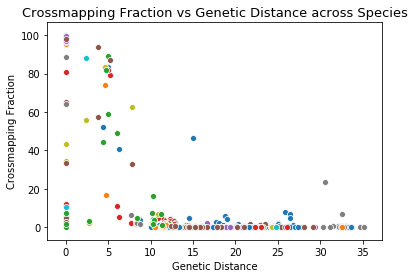

In [186]:
import glob
path = "/media/MassStorage/tmp/TE/honours/analysis/Alignment/*/*/match_distribution.csv"
path_names = glob.glob(path)
for path in path_names:
    template_frame = pd.DataFrame(data=None, columns = ['Species Name','Genetic Distance','Crossmapping Fraction'])
    if path[71:-23] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
            match_dist = pd.read_csv(path, header=0)
            for element in match_dist.index:
#                 print(match_dist.at[element,'analysis/Consensus/'+path[53:-22]][19:-1])
#                 print(match_dist.at[element,'Percentage Match'])
                tmp = pd.DataFrame(data=[[phylogeny[match_dist.at[element,'analysis/Consensus/'+path[53:-22]][19:-1]],None,match_dist.at[element,'Percentage Match']]],columns=['Species Name','Genetic Distance','Crossmapping Fraction'])
                template_frame = template_frame.append(tmp,ignore_index=True)
            template_frame = template_frame.set_index('Species Name')
            for element in template_frame.index:
                if np.isnan(large_frame.at[element,phylogeny[path[53:-23]]]):
                    template_frame.at[element,'Genetic Distance'] = 0
                else:
                    template_frame.at[element,'Genetic Distance'] = 100-large_frame.at[element,phylogeny[path[53:-23]]]
            figures = sns.scatterplot(x=template_frame['Genetic Distance'],y=template_frame['Crossmapping Fraction'])
            figures.set_title("Crossmapping Fraction vs Genetic Distance across Species", fontsize=13)
            ax = figures.get_figure()
            ax.savefig("../../analysis/Stats/crossmapvsgendist.png")

In [ ]:
import glob
path = "/media/MassStorage/tmp/TE/honours/analysis/Alignment/*/*/match_distribution.csv"
path_names = glob.glob(path)
for path in path_names:
    template_frame = pd.DataFrame(data=None, columns = ['Species Name','Genetic Distance','Crossmapping Fraction'])
    if path[71:-23] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
            match_dist = pd.read_csv(path, header=0)
            for element in match_dist.index:
#                 print(match_dist.at[element,'analysis/Consensus/'+path[53:-22]][19:-1])
#                 print(match_dist.at[element,'Percentage Match'])
                tmp = pd.DataFrame(data=[[phylogeny[match_dist.at[element,'analysis/Consensus/'+path[53:-22]][19:-1]],None,match_dist.at[element,'Percentage Match']]],columns=['Species Name','Genetic Distance','Crossmapping Fraction'])
                template_frame = template_frame.append(tmp,ignore_index=True)
            template_frame = template_frame.set_index('Species Name')
            for element in template_frame.index:
                if np.isnan(large_frame.at[element,phylogeny[path[53:-23]]]):
                    template_frame.at[element,'Genetic Distance'] = 0
                else:
                    template_frame.at[element,'Genetic Distance'] = 100-large_frame.at[element,phylogeny[path[53:-23]]]
            plt.figure()
            figures = sns.scatterplot(x=template_frame['Genetic Distance'],y=template_frame['Crossmapping Fraction'])
            figures.set_title("Crossmapping Fraction vs Genetic Distance for " + phylogeny[path[53:-23]], fontsize=15)
            plt.show()
            plt.close()

Draw line with nearest neighbour


Draw in facet plot based on nearest neighbour?


Color-code dots by genus?

In [107]:
%%writefile ../generate_summary_dataframe.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse

parser = argparse.ArgumentParser(description="""
Enter the analysis directory to generate a dataframe that extracts the details
for each sample
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_directory", help="Run from honours folder and input analysis/")
args = parser.parse_args()

phylogeny = {'20171103_FAH15473/barcode01': 'k__Fungi;p__Basidiomycota;c__Pucciniomycetes;o__Pucciniales;f__Pucciniaceae;g__Puccinia;s__striiformis-tritici',
             '20171103_FAH15473/barcode02': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Mycosphaerellaceae;g__Zymoseptoria;s__tritici',
             '20171103_FAH15473/barcode03': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Pyrenophora;s__tritici-repentis',
             '20171103_FAH15473/barcode04': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Nectriaceae;g__Fusarium;s__oxysporum',
             '20171103_FAH15473/barcode05': 'k__Fungi;p__Ascomycota;c__Pezizomycetes;o__Pezizales;f__Tuberaceae;g__Tuber;s__brumale',
             '20171103_FAH15473/barcode06': 'k__Fungi;p__Basidiomycota;c__Agaricomyectes;o__Agaricales;f__Cortinariaceae;g__Cortinarius;s__globuliformis',
             '20171103_FAH15473/barcode07': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__niger',
             '20171103_FAH15473/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Clavispora;s__lusitaniae',
        '20171103_FAH15473/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyveromyces;s__unidentified', # formerly Cryptococcus neoformans, matched in both UNITE and tree to Kluyveromyces
             '20171103_FAH15473/barcode10': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Penicillium;s__chrysogenum',
             '20171103_FAH15473/barcode11': 'k__Fungi;p__Basidiomycota;c__Microbotryomycetes;o__Sporidiobolales;f__Sporidiobolaceae;g__Rhodotorula;s__mucilaginosa',
             '20171103_FAH15473/barcode12': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Microascales;f__Microascaceae;g__Scedosporium;s__boydii',
             '20171207_FAH18654/barcode01': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Trichomonascaceae;g__Blastobotrys;s__proliferans', # matches Sugiyamella novakii in UNITE
             '20171207_FAH18654/barcode02': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Debaryomyces;s__unidentified', # formerly Candida zeylanoides, matched in both UNITE and tree as Debaryomces/Meyerozyma
        '20171207_FAH18654/barcode03': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Galactomyces;s__geotrichum', # tree puts it further away from other samples of its type, UNITE calls it Dipodascus
                                     # May have larger issues with Geotrichum candidum - maybe leave out?
             '20171207_FAH18654/barcode04': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Kodamaea;s__ohmeri',
             '20171207_FAH18654/barcode05': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Meyerozyma;s__guilliermondii',
             '20171207_FAH18654/barcode06': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Phaffomycetaceae;g__Wickerhamomyces;s__anomalus',
             '20171207_FAH18654/barcode07': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Yamadazyma;s__mexicana',
             '20171207_FAH18654/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Yamadazyma;s__scolyti',
             '20171207_FAH18654/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Yarrowia;s__lipolytica',
             '20171207_FAH18654/barcode11': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Trichomonascaceae;g__Zygoascus;s__hellenicus', # matches Sugiyamella novakii in UNITE
             '20171207_FAH18654/barcode12': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__flavus',
             
             '20171212_FAH18688/barcode01': 'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus;s__zero',
             '20171212_FAH18688/barcode02': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__unidentified',
         '20171212_FAH18688/barcode03': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Diaporthaceae;g__Diaporthe;s__CCL067',
             '20171212_FAH18688/barcode04': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Diaporthaceae;g__Diaporthe;s__unidentified',
             '20171212_FAH18688/barcode05': 'k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Dermateaceae;g__Oculimacula;s__yallundae-CCL031',
             '20171212_FAH18688/barcode06': 'k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Dermateaceae;g__Oculimacula;s__yallundae-CCL029',
             '20171212_FAH18688/barcode07': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Botryosphaeriales;f__Botryosphaeriaceae;g__Dothiorella;s__vidmadera',
             '20171212_FAH18688/barcode08': 'k__Fungi;p__Basidiomycota;c__Exobasidiomycetes;o__Microstromatales;f__Quambalariaceae;g__Quambalaria;s__cyanescens',
             '20171212_FAH18688/barcode09': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Xylariales;f__Xylariaceae;g__Entoleuca;s__unidentified',
                 '20171212_FAH18688/barcode11': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Gnomoniaceae;g__Asteroma;s__CCL060', # may be asteroma or Diaporthe
                 '20171212_FAH18688/barcode12': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Gnomoniaceae;g__Asteroma;s__CCL068',
             '20180108_FAH18647/barcode01': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Saccharomyces;s__cerevisiae',
             '20180108_FAH18647/barcode02': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Chaetothyriales;f__Herpotrichiellaceae;g__Cladophialophora;s__unidentified',
             '20180108_FAH18647/barcode03': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__albicans',
             '20180108_FAH18647/barcode04': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__metapsilosis',
             '20180108_FAH18647/barcode05': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__orthopsilosis',
             '20180108_FAH18647/barcode06': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__parapsilosis',
#          '20180108_FAH18647/barcode07': 'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus;s__gattii', # not including
#              '20180108_FAH18647/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Geotrichum;s__candidum', # not including
             '20180108_FAH18647/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__unidentified', # formerly Kluyveromyces lactis
             '20180108_FAH18647/barcode10': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyveromyces;s__marxianus',
             '20180108_FAH18647/barcode11': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Pichia;s__kudriavzevii',
             '20180108_FAH18647/barcode12': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Pichia;s__membranifaciens'}

summary = pd.DataFrame(data=None, columns = ['species','genus','family','order','class','phylum','kingdom','# raw reads','# reads after homology filtering','# reads after length filtering','path to raw reads','path to homology filtering','path to length filtering'])
import glob
path = "/media/MassStorage/tmp/TE/honours/analysis/Consensus/*/*/"
path_names = glob.glob(path)
for path in path_names:
    if path[-13:-1] != 'unclassified' and path[-28:-1] != '20171207_FAH18654/barcode10' and path[-28:-1] != '20171212_FAH18688/barcode10' and path[-28:-1] != '20180108_FAH18647/barcode07' and path[-28:-1] != '20180108_FAH18647/barcode08':
        key = path[-28:-1]
        if args.verbose:
            print('\033[0;34m' + "Opened barcode " + '\033[0;35m' + key + '\033[1;37m')
        species_ = phylogeny[key].split(';')[6].split('__')[1].lower()
        genus_ = phylogeny[key].split(';')[5].split('__')[1].lower()
        family_ = phylogeny[key].split(';')[4].split('__')[1].lower()
        order_ = phylogeny[key].split(';')[3].split('__')[1].lower()
        class_ = phylogeny[key].split(';')[2].split('__')[1].lower()
        phylum_ = phylogeny[key].split(';')[1].split('__')[1].lower()
        kingdom_ = phylogeny[key].split(';')[0].split('__')[1].lower()
        
        if args.verbose:
            print('\033[1;36m' + "BEGIN RAW"'\033[1;37m')
        raw_path = "analysis/Concatenated/"+key+"/merged.fastq"
        raw_reads = SeqIO.to_dict(SeqIO.parse(raw_path, "fastq"))
        raw_count = 0
        for entry in raw_reads:
            raw_count += 1
            
        if args.verbose:
            print('\033[1;36m' + "BEGIN HOMOLOGY"+ '\033[1;37m')
        homology_path = "analysis/Python_Processing/"+key+"/combined_test.paf"
        homology_paf = pd.read_csv(homology_path, sep='\t', header=None, engine='python')
        homology_reads = {}
        homology_count = 0
        for entry in homology_paf[0].unique():
            homology_count += 1
            
        if args.verbose:
            print('\033[1;36m' + "BEGIN LENGTH" + '\033[1;37m')
        length_path = "analysis/Length_Filtered/"+key+"/length_restricted_reads.fasta"
        length_reads = SeqIO.to_dict(SeqIO.parse(length_path, "fasta"))
        length_count = 0
        for entry in length_reads:
            length_count += 1
            
        if args.verbose:
            print('\033[1;36m' + "BEGIN USE" + '\033[1;37m')
        use_path = "analysis/Length_Filtered/"+key+"/length_restricted_for_use.fasta"
        use_reads = SeqIO.to_dict(SeqIO.parse(use_path, "fasta"))
        use_count = 0
        for entry in use_reads:
            use_count += 1


        add = pd.DataFrame([[species_, genus_, family_, order_, class_, phylum_, kingdom_, raw_count, homology_count, length_count, use_count, raw_path, homology_path, length_path, use_path]], columns = ['species','genus','family','order','class','phylum','kingdom','# raw reads','# reads after homology filtering','# reads after length filtering','# for use', 'path to raw reads','path to homology filtering','path to length filtering', 'path for use'], index=[key])
        summary = summary.append([add])
summary = summary.sort_index(axis=0)
summary = summary[['species','genus','family','order','class','phylum','kingdom','# raw reads','# reads after homology filtering','# reads after length filtering','# for use', 'path to raw reads','path to homology filtering','path to length filtering', 'path for use']]
summary.to_csv("analysis/Stats/reference_dataframe.csv")
if args.verbose:
            print('\033[0;34m' + "Reference Dataframe saved to " + '\033[0;35m' + "analysis/Stats/reference_dataframe.csv" + '\033[1;37m')

Overwriting ../generate_summary_dataframe.py


In [108]:
phylogeny = {'20171103_FAH15473/barcode01': 'k__Fungi;p__Basidiomycota;c__Pucciniomycetes;o__Pucciniales;f__Pucciniaceae;g__Puccinia;s__striiformis-tritici',
             '20171103_FAH15473/barcode02': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Mycosphaerellaceae;g__Zymoseptoria;s__tritici',
             '20171103_FAH15473/barcode03': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Pyrenophora;s__tritici-repentis',
             '20171103_FAH15473/barcode04': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Nectriaceae;g__Fusarium;s__oxysporum',
             '20171103_FAH15473/barcode05': 'k__Fungi;p__Ascomycota;c__Pezizomycetes;o__Pezizales;f__Tuberaceae;g__Tuber;s__brumale',
             '20171103_FAH15473/barcode06': 'k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Agaricales;f__Cortinariaceae;g__Cortinarius;s__globuliformis',
             '20171103_FAH15473/barcode07': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__niger',
             '20171103_FAH15473/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Clavispora;s__lusitaniae',
        '20171103_FAH15473/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyveromyces;s__unidentified', # formerly Cryptococcus neoformans, matched in both UNITE and tree to Kluyveromyces
             '20171103_FAH15473/barcode10': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Penicillium;s__chrysogenum',
             '20171103_FAH15473/barcode11': 'k__Fungi;p__Basidiomycota;c__Microbotryomycetes;o__Sporidiobolales;f__Sporidiobolaceae;g__Rhodotorula;s__mucilaginosa',
             '20171103_FAH15473/barcode12': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Microascales;f__Microascaceae;g__Scedosporium;s__boydii',
             '20171207_FAH18654/barcode01': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Trichomonascaceae;g__Blastobotrys;s__proliferans', # matches Sugiyamella novakii in UNITE
             '20171207_FAH18654/barcode02': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Debaryomyces;s__unidentified', # formerly Candida zeylanoides, matched in both UNITE and tree as Debaryomces/Meyerozyma
        '20171207_FAH18654/barcode03': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Galactomyces;s__geotrichum', # tree puts it further away from other samples of its type, UNITE calls it Dipodascus
                                     # May have larger issues with Geotrichum candidum - maybe leave out?
             '20171207_FAH18654/barcode04': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Kodamaea;s__ohmeri',
             '20171207_FAH18654/barcode05': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Meyerozyma;s__guilliermondii',
             '20171207_FAH18654/barcode06': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Phaffomycetaceae;g__Wickerhamomyces;s__anomalus',
             '20171207_FAH18654/barcode07': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Yamadazyma;s__mexicana',
             '20171207_FAH18654/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Yamadazyma;s__scolyti',
             '20171207_FAH18654/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Yarrowia;s__lipolytica',
             '20171207_FAH18654/barcode11': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Trichomonascaceae;g__Zygoascus;s__hellenicus', # matches Sugiyamella novakii in UNITE
             '20171207_FAH18654/barcode12': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__flavus',
             
             '20171212_FAH18688/barcode01': 'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus;s__zero',
             '20171212_FAH18688/barcode02': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__unidentified',
         '20171212_FAH18688/barcode03': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Diaporthaceae;g__Diaporthe;s__CCL067',
             '20171212_FAH18688/barcode04': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Diaporthaceae;g__Diaporthe;s__unidentified',
             '20171212_FAH18688/barcode05': 'k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Dermateaceae;g__Oculimacula;s__yallundae-CCL031',
             '20171212_FAH18688/barcode06': 'k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Dermateaceae;g__Oculimacula;s__yallundae-CCL029',
             '20171212_FAH18688/barcode07': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Botryosphaeriales;f__Botryosphaeriaceae;g__Dothiorella;s__vidmadera',
             '20171212_FAH18688/barcode08': 'k__Fungi;p__Basidiomycota;c__Exobasidiomycetes;o__Microstromatales;f__Quambalariaceae;g__Quambalaria;s__cyanescens',
             '20171212_FAH18688/barcode09': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Xylariales;f__Xylariaceae;g__Entoleuca;s__unidentified',
                 '20171212_FAH18688/barcode11': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Gnomoniaceae;g__Asteroma;s__CCL060', # may be asteroma or Diaporthe
                 '20171212_FAH18688/barcode12': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Gnomoniaceae;g__Asteroma;s__CCL068',
             '20180108_FAH18647/barcode01': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Saccharomyces;s__cerevisiae',
             '20180108_FAH18647/barcode02': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Chaetothyriales;f__Herpotrichiellaceae;g__Cladophialophora;s__unidentified',
             '20180108_FAH18647/barcode03': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__albicans',
             '20180108_FAH18647/barcode04': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__metapsilosis',
             '20180108_FAH18647/barcode05': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__orthopsilosis',
             '20180108_FAH18647/barcode06': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__parapsilosis',
#          '20180108_FAH18647/barcode07': 'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus;s__gattii', # not including
#              '20180108_FAH18647/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Geotrichum;s__candidum', # not including
             '20180108_FAH18647/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Candida;s__unidentified', # formerly Kluyveromyces lactis
             '20180108_FAH18647/barcode10': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyveromyces;s__marxianus',
             '20180108_FAH18647/barcode11': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Pichia;s__kudriavzevii',
             '20180108_FAH18647/barcode12': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Pichia;s__membranifaciens'}
with open('../../analysis/Stats/taxonomy_file.csv', 'w+') as f:
    for key in phylogeny.keys():
        print(phylogeny[key])
        f.write("%s,%s\n"%(key,phylogeny[key]))

k__Fungi;p__Basidiomycota;c__Pucciniomycetes;o__Pucciniales;f__Pucciniaceae;g__Puccinia;s__striiformis-tritici
k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Mycosphaerellaceae;g__Zymoseptoria;s__tritici
k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Pyrenophora;s__tritici-repentis
k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Nectriaceae;g__Fusarium;s__oxysporum
k__Fungi;p__Ascomycota;c__Pezizomycetes;o__Pezizales;f__Tuberaceae;g__Tuber;s__brumale
k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Agaricales;f__Cortinariaceae;g__Cortinarius;s__globuliformis
k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__niger
k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Clavispora;s__lusitaniae
k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyveromyces;s__unidentified
k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales

In [106]:
phylogeny = {'20171103_FAH15473/barcode01': 'k__Fungi;p__Basidiomycota;c__Pucciniomycetes;o__Pucciniales;f__Pucciniaceae;g__Puccinia;s__Puccinia_striiformis',
             '20171103_FAH15473/barcode02': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Mycosphaerellaceae;g__Zymoseptoria;s__Zymoseptoria_tritici',
             '20171103_FAH15473/barcode03': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Pyrenophora;s__Pyrenophora_tritici-repentis',
             '20171103_FAH15473/barcode04': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Nectriaceae;g__Fusarium;s__Fusarium_oxysporum',
             '20171103_FAH15473/barcode05': 'k__Fungi;p__Ascomycota;c__Pezizomycetes;o__Pezizales;f__Tuberaceae;g__Tuber;s__Tuber_brumale',
             '20171103_FAH15473/barcode06': 'k__Fungi;p__Basidiomycota;c__Agaricomycetes;o__Agaricales;f__Cortinariaceae;g__Cortinarius;s__Cortinarius_globuliformis',
             '20171103_FAH15473/barcode07': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__Aspergillus_niger',
             '20171103_FAH15473/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Clavispora;s__Clavispora_lusitaniae',
        '20171103_FAH15473/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyveromyces;s__unidentified', # formerly Cryptococcus neoformans, matched in both UNITE and tree to Kluyveromyces
             '20171103_FAH15473/barcode10': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Penicillium;s__Penicillium_chrysogenum',
             '20171103_FAH15473/barcode11': 'k__Fungi;p__Basidiomycota;c__Microbotryomycetes;o__Sporidiobolales;f__Sporidiobolaceae;g__Rhodotorula;s__Rhodotorula_mucilaginosa',
             '20171103_FAH15473/barcode12': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Microascales;f__Microascaceae;g__Scedosporium;s__Scedosporium_boydii',
             '20171207_FAH18654/barcode01': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Trichomonascaceae;g__Blastobotrys;s__Blastobotrys_proliferans', # matches Sugiyamella novakii in UNITE
             '20171207_FAH18654/barcode02': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Debaryomyces;s__unidentified', # formerly Candida zeylanoides, matched in both UNITE and tree as Debaryomces/Meyerozyma
        '20171207_FAH18654/barcode03': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Galactomyces;s__Galactomyces_geotrichum', # tree puts it further away from other samples of its type, UNITE calls it Dipodascus
                                     # May have larger issues with Geotrichum candidum - maybe leave out?
             '20171207_FAH18654/barcode04': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Kodamaea;s__Kodamaea_ohmeri',
             '20171207_FAH18654/barcode05': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Meyerozyma;s__Meyerozyma_guilliermondii',
             '20171207_FAH18654/barcode06': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Phaffomycetaceae;g__Wickerhamomyces;s__Wickerhamomyces_anomalus',
             '20171207_FAH18654/barcode07': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Yamadazyma;s__Yamadazyma_mexicana',
             '20171207_FAH18654/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Debaryomycetaceae;g__Yamadazyma;s__Yamadazyma_scolyti',
             '20171207_FAH18654/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Yarrowia;s__Yarrowia_lipolytica',
             '20171207_FAH18654/barcode11': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Trichomonascaceae;g__Zygoascus;s__Zygoascus_hellenicus', # matches Sugiyamella novakii in UNITE
             '20171207_FAH18654/barcode12': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__Aspergillus_flavus',
             
             '20171212_FAH18688/barcode01': 'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus;s__Cryptococcus_zero',
             '20171212_FAH18688/barcode02': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__unidentified',
         '20171212_FAH18688/barcode03': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Diaporthaceae;g__Diaporthe;s__Diaporthe_CCL067',
             '20171212_FAH18688/barcode04': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Diaporthaceae;g__Diaporthe;s__unidentified',
             '20171212_FAH18688/barcode05': 'k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Dermateaceae;g__Oculimacula;s__Oculimacula_yallundae_CCL031',
             '20171212_FAH18688/barcode06': 'k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Dermateaceae;g__Oculimacula;s__Oculimacula_yallundae_CCL029',
             '20171212_FAH18688/barcode07': 'k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Botryosphaeriales;f__Botryosphaeriaceae;g__Dothiorella;s__Dothiorella_vidmadera',
             '20171212_FAH18688/barcode08': 'k__Fungi;p__Basidiomycota;c__Exobasidiomycetes;o__Microstromatales;f__Quambalariaceae;g__Quambalaria;s__Quambalaria_cyanescens',
             '20171212_FAH18688/barcode09': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Xylariales;f__Xylariaceae;g__Entoleuca;s__unidentified',
                 '20171212_FAH18688/barcode11': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Gnomoniaceae;g__Asteroma;s__Asteroma_CCL060', # may be asteroma or Diaporthe
                 '20171212_FAH18688/barcode12': 'k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Diaporthales;f__Gnomoniaceae;g__Asteroma;s__Asteroma_CCL068',
             '20180108_FAH18647/barcode01': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Saccharomyces;s__Saccharomyces_cerevisiae',
             '20180108_FAH18647/barcode02': 'k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Chaetothyriales;f__Herpotrichiellaceae;g__Cladophialophora;s__unidentified',
             '20180108_FAH18647/barcode03': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetales_fam_Incertae_sedis;g__Candida;s__Candida_albicans',
             '20180108_FAH18647/barcode04': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetales_fam_Incertae_sedis;g__Candida;s__Candida_metapsilosis',
             '20180108_FAH18647/barcode05': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetales_fam_Incertae_sedis;g__Candida;s__Candida_orthopsilosis',
             '20180108_FAH18647/barcode06': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetales_fam_Incertae_sedis;g__Candida;s__Candida_parapsilosis',
#          '20180108_FAH18647/barcode07': 'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus;s__gattii', # not including
#              '20180108_FAH18647/barcode08': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Dipodascaceae;g__Geotrichum;s__candidum', # not including
             '20180108_FAH18647/barcode09': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetales_fam_Incertae_sedis;g__Candida;s__unidentified', # formerly Kluyveromyces lactis
             '20180108_FAH18647/barcode10': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyveromyces;s__Kluyveromyces_marxianus',
             '20180108_FAH18647/barcode11': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Pichia;s__Pichia_kudriavzevii',
             '20180108_FAH18647/barcode12': 'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Pichiaceae;g__Pichia;s__Pichia_membranifaciens'}
with open('../../analysis/Stats/taxonomy_file_qiime.csv', 'w+') as f:
    for key in phylogeny.keys():
        print(phylogeny[key])
        f.write("%s\t%s\n"%(key,phylogeny[key]))

k__Fungi;p__Basidiomycota;c__Pucciniomycetes;o__Pucciniales;f__Pucciniaceae;g__Puccinia;s__Puccinia_striiformis
k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Mycosphaerellaceae;g__Zymoseptoria;s__Zymoseptoria_tritici
k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Pyrenophora;s__Pyrenophora_tritici-repentis
k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Nectriaceae;g__Fusarium;s__Fusarium_oxysporum
k__Fungi;p__Ascomycota;c__Pezizomycetes;o__Pezizales;f__Tuberaceae;g__Tuber;s__Tuber_brumale
k__Fungi;p__Basidiomycota;c__Agaricomyctes;o__Agaricales;f__Cortinariaceae;g__Cortinarius;s__Cortinarius_globuliformis
k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Eurotiales;f__Aspergillaceae;g__Aspergillus;s__Aspergillus_niger
k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Metschnikowiaceae;g__Clavispora;s__Clavispora_lusitaniae
k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Kluyverom

In [ ]:
%%writefile ../numberfy_fasta.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse


parser = argparse.ArgumentParser(description="""
This creates a machine-learning friendly version of each length restricted fasta file
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_file", help="The input file for extraction")
args = parser.parse_args()

if args.verbose:
    print("Input file is " + args.input_file + "\n")

fasta = SeqIO.to_dict(SeqIO.parse(args.input_file, "fasta"))

fasta_numbers = fasta.copy()

for key in fasta:
    seq = str(fasta[key].seq[30:-30]).replace("A",'0').replace("C",'1').replace("G",'2').replace("T",'3')
#     if len(seq) < max(total_lens):
#         seq = seq + '4'*(max(total_lens)-len(seq))
    fasta_numbers[key].seq = Seq(seq)

with open(args.input_file[:-6]+'_numbers.fasta', "w") as output_handle:
    SeqIO.write(fasta_numbers.values(), output_handle, 'fasta')

# WILL NEED TO APPLY FILTERING TO BADREAD GENERATED READS

In [ ]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import argparse

# Load the full file containing all reads for this barcode
full_file_dict = SeqIO.to_dict(SeqIO.parse('../../analysis/Length_Filtered/20171207_FAH18654/barcode03/length_restricted_extended.fastq', "fastq"))

# Extract the information about the lengths of the sequence for each read in this barcode
full_lengths = []
for key in full_file_dict:
    if 1500 < len(full_file_dict[key].seq) < 5000:
        full_lengths.append(len(full_file_dict[key].seq))
full_lengths_len = len(full_lengths)

ax = sns.distplot(full_lengths, color="k", kde=False, bins=5000)
ax.set(xlim=(250, 3500))
ax.set_title("Read spread for extended", fontsize=15)
ax.set_xlabel("Length of read", fontsize=13)
ax.set_ylabel("Number of reads", fontsize=13)
figure1 = ax.get_figure()
display(figure1)
figure1.clf()

mean = np.mean(full_lengths)
std = np.std(full_lengths)

print(mean)
print(std)
    
print(full_lengths_len)
    
length_filt_dict = full_file_dict.copy()
for key in full_file_dict:
    if len(full_file_dict[key].seq) < (mean-1.645*std) or len(full_file_dict[key].seq) > (mean+1.645*std):
        del length_filt_dict[key]
print(len(length_filt_dict))

        
        
SeqIO.write(length_filt_dict.values(), '../../analysis/Length_Filtered/20171207_FAH18654/barcode03/length_restricted_extended.fasta', "fasta")
# if args.verbose:
#     print('\033[1;36m' + 'Saved %s' % ('/'.join([output_folder, 'length_restricted_reads.fasta'])) + '\033[1;37m')     
    
    
    
# length_filt_lens = []
# len_filt_keys = []
# for key in length_filt_dict:
#     length_filt_lens.append(len(length_filt_dict[key].seq))
#     len_filt_keys.append(key)

    
    


    
# Extract the qscores
# if args.verbose:
#     print('\033[0;34m' + "Loading " + 'Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt' + '\033[1;37m')
# summ_stats_csv = pd.read_csv('Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt', sep='\t', header=None, names=['filename', 'read_id', 'run_id', 'batch_id', 'channel', 'mux', 'start_time', 'duration', 'num_events', 'passes_filtering', 'template_start', 'num_events_template', 'template_duration', 'sequence_length_template', 'mean_qscore_template', 'strand_score_template', 'median_template', 'mad_template'], engine='python')
# summ_stats_csv = pd.DataFrame(summ_stats_csv[1:])
# summary_list = []
# for column, row in summ_stats_csv.iterrows():
#     if row['read_id'] in full_keys:
#         summary_list.append([row['read_id'], row['mean_qscore_template']])
# summary_frame = pd.DataFrame(summary_list)
# if args.verbose:
#     print('\033[0;34m' + "Finished with " + 'Basecalled/'+'/'.join(args.full_file.rsplit('/')[-3:-1])+'/sequencing_summary.txt' + '\033[1;37m')
    
# Create a dictionary containing the statistics for the filtered dataset
#     Total no. frDNA reads, Min. read length, Max. read length, Mean read length, Median read length, Quality score

# stats_dict = {'number of frDNA reads':len(length_filt_lens),'minimum read length':min(length_filt_lens),'maximum read length':max(length_filt_lens),'mean read length':"{:.0f}".format(np.mean(length_filt_lens)),'std dev':"{:.0f}".format(np.std(length_filt_lens)),'median read length':"{:.0f}".format(np.median(length_filt_lens))
#               ,'min_qscore':"{:.2f}".format(min(summary_frame[1].astype(float))), 'max_qscore':"{:.2f}".format(max(summary_frame[1].astype(float))), 'mean_qscore':"{:.2f}".format(np.mean(summary_frame[1].astype(float))), 'median_qscore':"{:.2f}".format(np.median(summary_frame[1].astype(float)))
#              }
# stats = pd.DataFrame(stats_dict, index=['%s' % '/'.join(args.full_file.rsplit('/')[-3:-1])])    
              
# bx = sns.distplot(length_filt_lens, color="k", kde=False)
# bx.set(xlim=(250, 3500))
# bx.set_title("frDNA reads for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
# bx.set_xlabel("Length of read", fontsize=13)
# bx.set_ylabel("Number of reads", fontsize=13)
# figure2 = bx.get_figure()
# figure2.savefig('/'.join([output_folder, 'frDNA_len_filt_full.png']))
# figure2.clf()
# if args.verbose:
#     print('\033[0;32m' + "frDNA spread image file saved to " + '/'.join([output_folder, 'frDNA_len_filt_full.png']) + '\033[1;37m')

# cx = sns.distplot(length_filt_lens, color="k", kde=False)
# cx.set(xlim=((mean-1.645*std)-100, (mean+1.645*std)+100))
# cx.set_title("frDNA reads for %s" % '/'.join(args.full_file.rsplit('/')[-3:-1]), fontsize=15)
# cx.set_xlabel("Length of read", fontsize=13)
# cx.set_ylabel("Number of reads", fontsize=13)
# figure3 = cx.get_figure()
# figure3.savefig('/'.join([output_folder, 'frDNA_len_filt_limited.png']))
# figure3.clf()
# if args.verbose:
#     print('\033[0;32m' + "Zoomed-in frDNA spread image file saved to " + '/'.join([output_folder, 'frDNA_len_filt_limited.png']) + '\033[1;37m')

# stats.to_csv('/'.join([output_folder, 'frDNA_len_filt_statistics.csv']), index=False)
# if args.verbose:
#     print('\033[0;32m' + "Summary statistics file saved to " + '/'.join([output_folder, 'frDNA_len_filt_statistics.csv']) + '\033[1;37m')
    
# print('\033[0;35m'+'END'+'\033[1;37m')

In [180]:
nodes_dict = {
    1: 'kingdom fungi',
              2: 'phylum ascomycota',
              3: 'class eurotiomycetes',
              4: 'family aspergillaceae',
              5: 'genus aspergillus',
              6: 'class dothideomycetes',
              7: 'genus oculimacula',
              8: 'order saccharomycetales',
              9: 'family debaryomycetaceae',
              10: 'genus yamadazyma',
              11: 'family dipodascaceae',
              12: 'family metschnikowiaceae',
              13: 'genus pichia',
              14: 'family saccharomycetaceae',
              15: 'genus candida',
              16: 'genus kluyveromyces',
              17: 'family trichomonascaceae',
              18: 'class sordariomycetes',
              19: 'order diaporthales',
              20: 'genus diaporthe',
              21: 'genus asteroma',
              22: 'phylum basidiomycota'
             }

In [181]:
for key in nodes_dict:
    print(nodes_dict[key].split(' ')[0], nodes_dict[key].split(' ')[1])

kingdom fungi
phylum ascomycota
class eurotiomycetes
family aspergillaceae
genus aspergillus
class dothideomycetes
genus oculimacula
order saccharomycetales
family debaryomycetaceae
genus yamadazyma
family dipodascaceae
family metschnikowiaceae
genus pichia
family saccharomycetaceae
genus candida
genus kluyveromyces
family trichomonascaceae
class sordariomycetes
order diaporthales
genus diaporthe
genus asteroma
phylum basidiomycota


In [182]:
with open('../../analysis/Stats/nodes.csv', 'w+') as f:
    for key in nodes_dict.keys():
        print(nodes_dict[key])
        f.write("%s\n"%(nodes_dict[key]))

kingdom fungi
phylum ascomycota
class eurotiomycetes
family aspergillaceae
genus aspergillus
class dothideomycetes
genus oculimacula
order saccharomycetales
family debaryomycetaceae
genus yamadazyma
family dipodascaceae
family metschnikowiaceae
genus pichia
family saccharomycetaceae
genus candida
genus kluyveromyces
family trichomonascaceae
class sordariomycetes
order diaporthales
genus diaporthe
genus asteroma
phylum basidiomycota


In [83]:
for index, row in ref_df.iterrows():
    print(row['path for use'])
    print("\n")

analysis/Length_Filtered/20171103_FAH15473/barcode01/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode02/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode03/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode04/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode05/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode06/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode07/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode08/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode09/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode10/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/barcode11/length_restricted_for_use.fasta


analysis/Length_Filtered/20171103_FAH15473/

In [113]:
dicta = {'a': 'a', 'b': 'b', 'c': 'c'}

with open('../../test.txt', 'w+') as handle:
    handle.writelines("%s\n" % entry for entry in dicta)

In [203]:
np.mean([0.916452442159383,0.9244889445139758,0.9760975609756097,0.9333333333333333,0.9598737601442742])

0.9420492082253151

In [204]:
np.mean([0.943954104148279,0.9613882863340564,0.9083068542896051,0.957592339261286,0.9329535495179667])

0.9408390267102386

In [205]:
np.mean([0.93,0.942577626541897,0.9409828356454268,0.9453072248480757,0.9462222222222223])

0.9410179818515244

In [227]:
fasta_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/Length_Filtered/wheat/barcode01/length_restricted_reads.fasta", "fasta"))
lengthe = []
for key in fasta_dict:
    lengthe.append(len(fasta_dict[key].seq))
print(min(lengthe))
print(max(lengthe))
print(np.mean(lengthe))
print(np.median(lengthe))
print(np.std(lengthe))
print(len(lengthe))

2135
3560
2982.837424733673
3008.0
125.65695734487451
21590


#### What I want to do

For barcode in the wheat samples, save into a dataframe: <br> <br>
    - suspected species 1, suspected species 2, # reads in merged.fastq, # reads after homology filtering, # reads after length filtering, # reads for use, path to raw, path to homology, path to length, path for use

In [255]:
%%writefile ../generate_wheat_summary_dataframe.py

import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
# import seaborn as sns
import csv
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")
import argparse

parser = argparse.ArgumentParser(description="""
Enter the analysis directory to generate a dataframe that extracts the details
for each sample
""")
group = parser.add_mutually_exclusive_group()
group.add_argument("--verbose", "-v", "--v", action="store_true")
group.add_argument("--quiet", "-q", "--q", action="store_true")
parser.add_argument("input_directory", help="Run from honours folder and input analysis/")
args = parser.parse_args()

suspected = {'barcode01': 's__Puccinia_striiformis',
             'barcode02': 's__Zymoseptoria_tritici',
             'barcode03': 's__unknown', # healthy wheat
             'barcode04': 's__Puccinia_striiformis,s__Zymoseptoria_tritici', # both Pst + Zymo
             'barcode05': 's__Pyrenophora_tritici-repentis',
             'barcode06': 's__unknown', # healthy, resistant wheat, 2nd year,
             'barcode07': 's__unknown', # healthy, susceptible wheat, 2nd year
             'barcode08': 's__Puccinia_striiformis',
             'barcode09': 's__Puccinia_striiformis,s__Pyrenophora_tritici-repentis', # both Pst + Pyr
             'barcode10': 's__Puccinia_striiformis,s__Zymoseptoria_tritici', # both Pst + Zymo
             'barcode11': 's__Zymoseptoria_tritici,s__Puccinia_striiformis', # Zymo + Pst?
             'barcode12': 'none'# is just water
            }


summary = pd.DataFrame(data=None, columns = ['species 1', 'species 2','# raw reads','# reads after homology filtering','# reads after length filtering','path to raw reads','path to homology filtering','path to length filtering'])

import glob
path = "/media/MassStorage/tmp/TE/honours/analysis/Length_Filtered/wheat/*/"
path_names = glob.glob(path)
for path in path_names:
    if path[-13:-1] != 'unclassified' and path[-10:-1] != 'barcode12':
        key = path[-10:-1]
        if args.verbose:
            print('\033[0;34m' + "Opened barcode " + '\033[0;35m' + key + '\033[1;37m')
        if len(suspected[key].split(',')) == 1:
            species1 = suspected[key].split(',')[0].split('__')[1]
            species2 = None
        elif len(suspected[key].split(',')) == 2:
            species1 = suspected[key].split(',')[0].split('__')[1]
            species2 = suspected[key].split(',')[1].split('__')[1]
        
        if args.verbose:
            print('\033[1;36m' + "BEGIN RAW"'\033[1;37m')
        raw_path = "analysis/Concatenated/wheat/"+key+"/merged.fastq"
        raw_reads = SeqIO.to_dict(SeqIO.parse(raw_path, "fastq"))
        raw_count = 0
        for entry in raw_reads:
            raw_count += 1
            
        if args.verbose:
            print('\033[1;36m' + "BEGIN HOMOLOGY"+ '\033[1;37m')
        homology_path = "analysis/Python_Processing/wheat/"+key+"/combined_test.paf"
        homology_paf = pd.read_csv(homology_path, sep='\t', header=None, engine='python')
        homology_reads = {}
        homology_count = 0
        for entry in homology_paf[0].unique():
            homology_count += 1
            
        if args.verbose:
            print('\033[1;36m' + "BEGIN LENGTH" + '\033[1;37m')
        length_path = "analysis/Length_Filtered/wheat/"+key+"/length_restricted_reads.fasta"
        length_reads = SeqIO.to_dict(SeqIO.parse(length_path, "fasta"))
        length_count = 0
        for entry in length_reads:
            length_count += 1
            
        if args.verbose:
            print('\033[1;36m' + "BEGIN USE" + '\033[1;37m')
        use_path = length_path
        use_count = length_count


        add = pd.DataFrame([[species1, species2, raw_count, homology_count, length_count, use_count, raw_path, homology_path, length_path, use_path]], columns = ['species1', 'species2','# raw reads','# reads after homology filtering','# reads after length filtering','# for use', 'path to raw reads','path to homology filtering','path to length filtering', 'path for use'], index=[key])
        summary = summary.append([add])
summary = summary.sort_index(axis=0)
summary = summary[['species1', 'species2','# raw reads','# reads after homology filtering','# reads after length filtering','# for use', 'path to raw reads','path to homology filtering','path to length filtering', 'path for use']]
summary.to_csv("analysis/Stats/wheat_reference_dataframe.csv")
if args.verbose:
            print('\033[0;34m' + "Reference Dataframe saved to " + '\033[0;35m' + "analysis/Stats/wheat_reference_dataframe.csv" + '\033[1;37m')

Overwriting ../generate_wheat_summary_dataframe.py
